In [1]:
import sys
lib = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\utilities\droplet_dataset'
lib2 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\utilities'
lib3 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\data_analysis'
lib4 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy'
sys.path.append(lib)
sys.path.append(lib2)
sys.path.append(lib3)
sys.path.append(lib4)

In [2]:
import os
from os.path import join
import sklearn
from droplet_dataset import *
from utilities import *
from matplotlib import pyplot
import numpy as np
import scipy
import pickle
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import random
from scipy.stats import pearsonr
from matplotlib.pyplot import figure
sklearn.__version__
%matplotlib notebook

In [3]:
# functions:
def mitochondria_content_threshold(percetage_of_mitochondria, threshold):
    """
    Return threshold_text, number of cells having mit content < threshold, percentage of cells having mit content < threshold.
    """
    indexes = np.where(percetage_of_mitochondria > threshold)
    print(f'number of cells which their mitochondria genes account more than {threshold*100}% : {len(mitochondria_genes[indexes])}')
    print(f'the portion of cells we would drop: {round(len(mitochondria_genes[indexes])/counts.shape[0]*100, 3)}%')
    threshold_text = f'{len(mitochondria_genes[indexes])} cells {round(len(mitochondria_genes[indexes])/counts.shape[0]*100, 3)}%  \n will be removed'
    return threshold_text, len(mitochondria_genes[indexes]), round(len(mitochondria_genes[indexes])/counts.shape[0]*100, 3)


# The portion of mitochondria content for one sample
* Shows the data of removing apoptosis cells using two different selected threshold. Graphs:
 1. Histogram of percetage of mitochondria content.
 2. Plot: X - Percetage of mitochondria content. Y - Number of reads
* Option to save the graphs

   #### PLEASE SELECT SAMPLE ID AND 2 THRESHOLDS

count shape (6260, 20368)
number of cells 6260
number of genes 20368


<IPython.core.display.Javascript object>


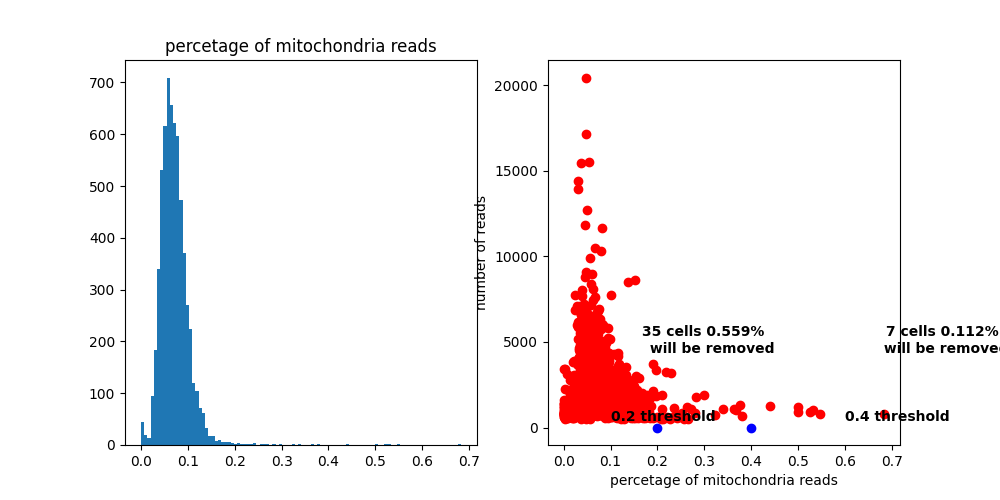

number of cells which their mitochondria genes account more than 20.0% : 35
the portion of cells we would drop: 0.559%
number of cells which their mitochondria genes account more than 40.0% : 7
the portion of cells we would drop: 0.112%


Text(0.95, 4200, '7 cells 0.112%  \n will be removed')

In [6]:
# select sample id
sample_id = 'M139'
# select the threshold you're interested in.
threshold_1 = 0.2
threshold_2 = 0.4


sample = fr'D:\Technion studies\Keren Laboratory\Data\droplet_seq\all_samples\{sample_id}\RNA_sample.pkl'
data = pickle.load(open(sample, 'rb'))
genes = data.gene_names
counts = data.counts
print(f'count shape {counts.shape}')
print(f'number of cells {counts.shape[0]}')
print(f'number of genes {counts.shape[1]}')


counting_reads = counts.sum(axis=1)
mitochondria_genes = counts[:, [s.startswith('MT-') for s in genes]].sum(axis=1)


fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

# Extract mitochondria content.
counting_reads = counting_reads.astype(np.float64)
mitochondria_genes = mitochondria_genes.astype(np.float64)
percetage_of_mitochondria = np.divide(mitochondria_genes, counting_reads, out=np.zeros_like(counting_reads), where=counting_reads!=0)


# 1. Histogram of percetage of mitochondria content.
axs[0].hist(percetage_of_mitochondria, bins=100)
axs[0].set_title("percetage of mitochondria reads")


threshold_1_text, _, _ = mitochondria_content_threshold(percetage_of_mitochondria, threshold_1)
threshold_2_text, _, _ = mitochondria_content_threshold(percetage_of_mitochondria, threshold_2)


# 2. Plot of  X - Percetage of mitochondria content. Y - Number of reads.
axs[1].plot(percetage_of_mitochondria, counting_reads, 'ro')
axs[1].plot([threshold_1, threshold_2], [0, 0], 'bo')
axs[1].set_ylabel('number of reads')
axs[1].set_xlabel('percetage of mitochondria reads')


# Polishes it a little bit.
plt.annotate(f"{threshold_1} threshold",xy=(0.1,400), weight='bold')
plt.annotate(f"{threshold_2} threshold",xy=(0.6,400), weight='bold')
plt.text(0.45,4200, threshold_1_text,
        verticalalignment='bottom', horizontalalignment='right',
        color='black',weight='bold', fontsize=10)
plt.text(0.95,4200, threshold_2_text,
        verticalalignment='bottom', horizontalalignment='right',
        color='black',weight='bold', fontsize=10)


# if you want to save it, remove the comment
# fig.savefig(rf'C:\Users\itay\Desktop\Technion studies\Keren Laboratory\python_playground\output files\apoptosis\{sample_id}.png')


# The portion of mitochondria content for all samples
* Shows the data of removing apoptosis cells using two different selected threshold. Graphs:
 1. Histogram of percetage of mitochondria content.
 2. Plot: X - Percetage of mitochondria content. Y - Number of reads
* Option to save the graphs

    #### PLEASE SELECT: Input/output path and two threshold.

<IPython.core.display.Javascript object>


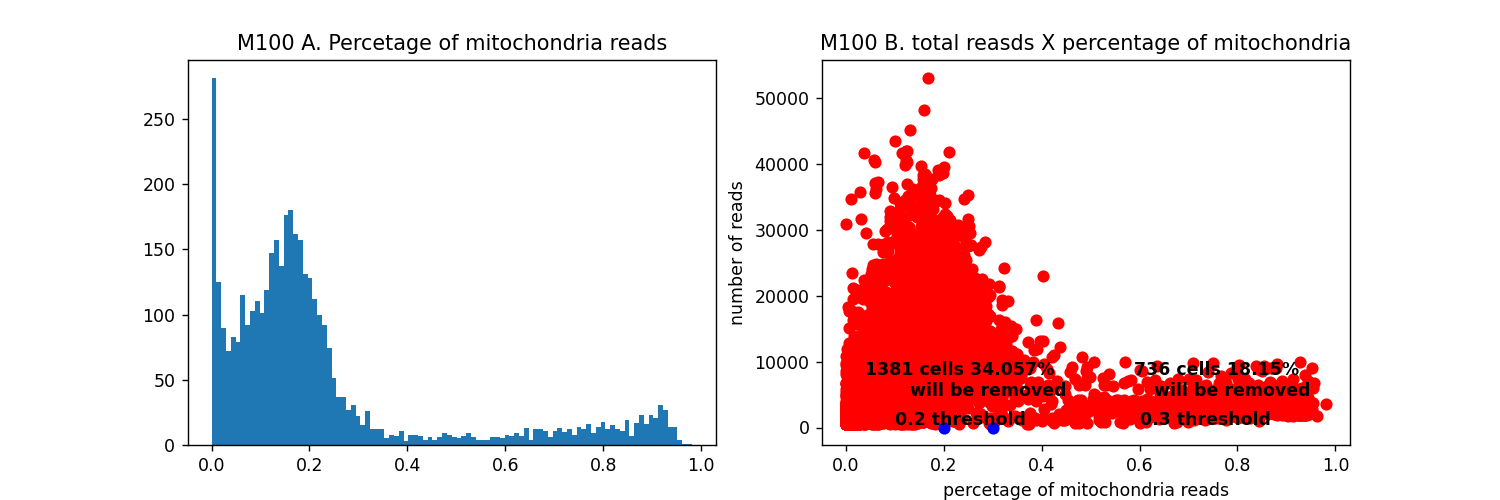

M100
number of cells which their mitochondria genes account more than 20.0% : 1381
the portion of cells we would drop: 34.057%
number of cells which their mitochondria genes account more than 30.0% : 736
the portion of cells we would drop: 18.15%


<IPython.core.display.Javascript object>


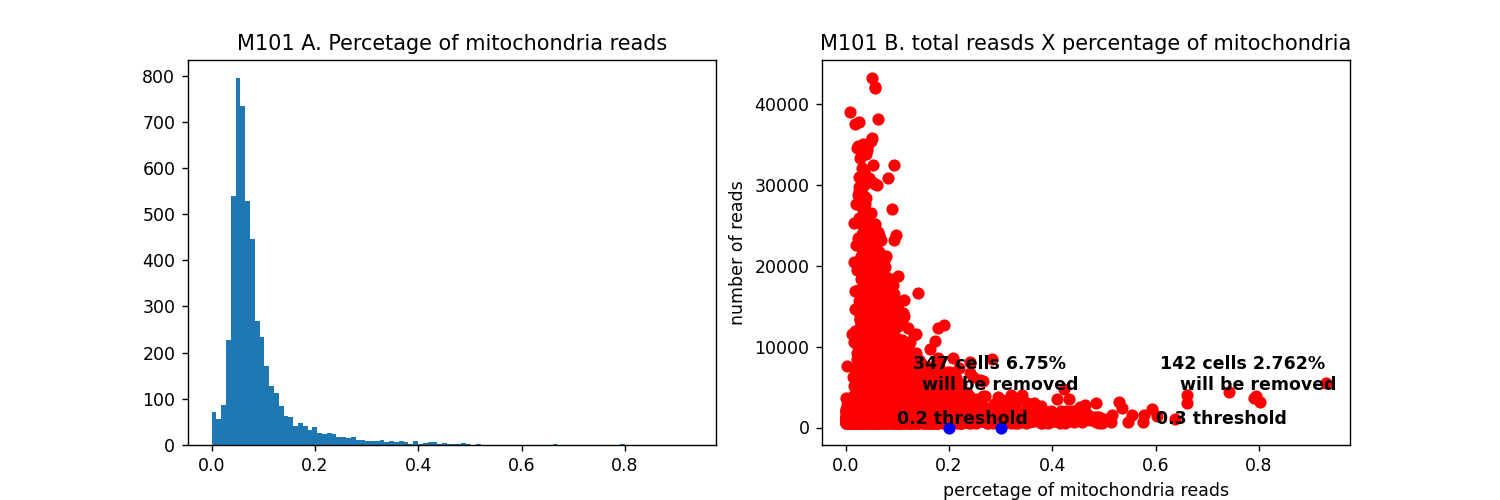

M101
number of cells which their mitochondria genes account more than 20.0% : 347
the portion of cells we would drop: 6.75%
number of cells which their mitochondria genes account more than 30.0% : 142
the portion of cells we would drop: 2.762%


<IPython.core.display.Javascript object>


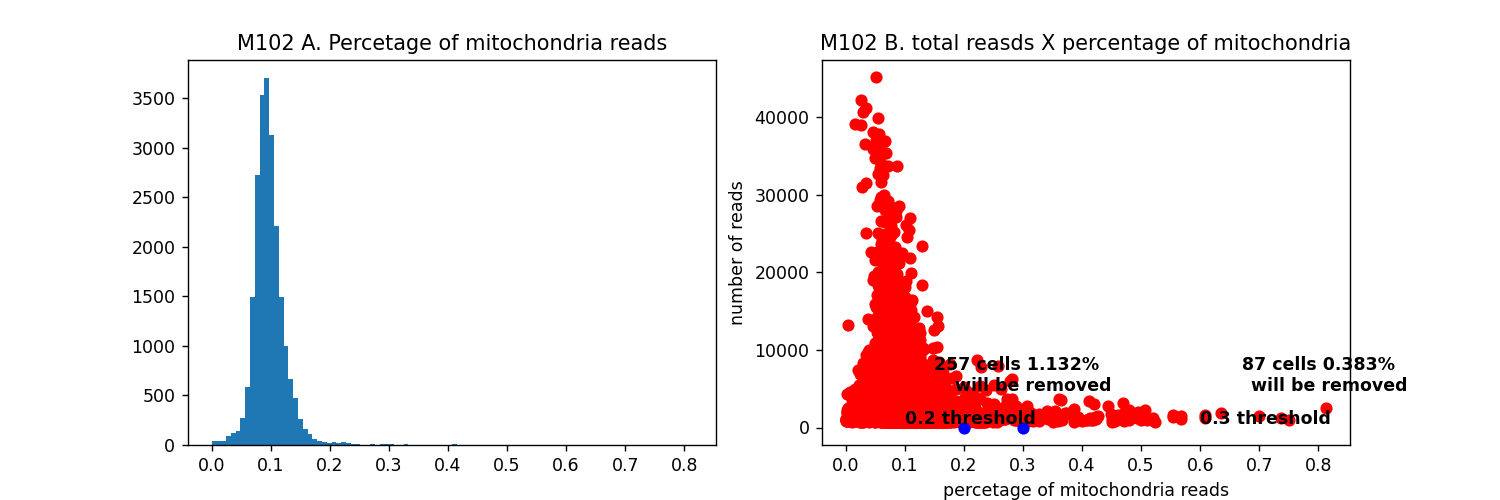

M102
number of cells which their mitochondria genes account more than 20.0% : 257
the portion of cells we would drop: 1.132%
number of cells which their mitochondria genes account more than 30.0% : 87
the portion of cells we would drop: 0.383%


<IPython.core.display.Javascript object>


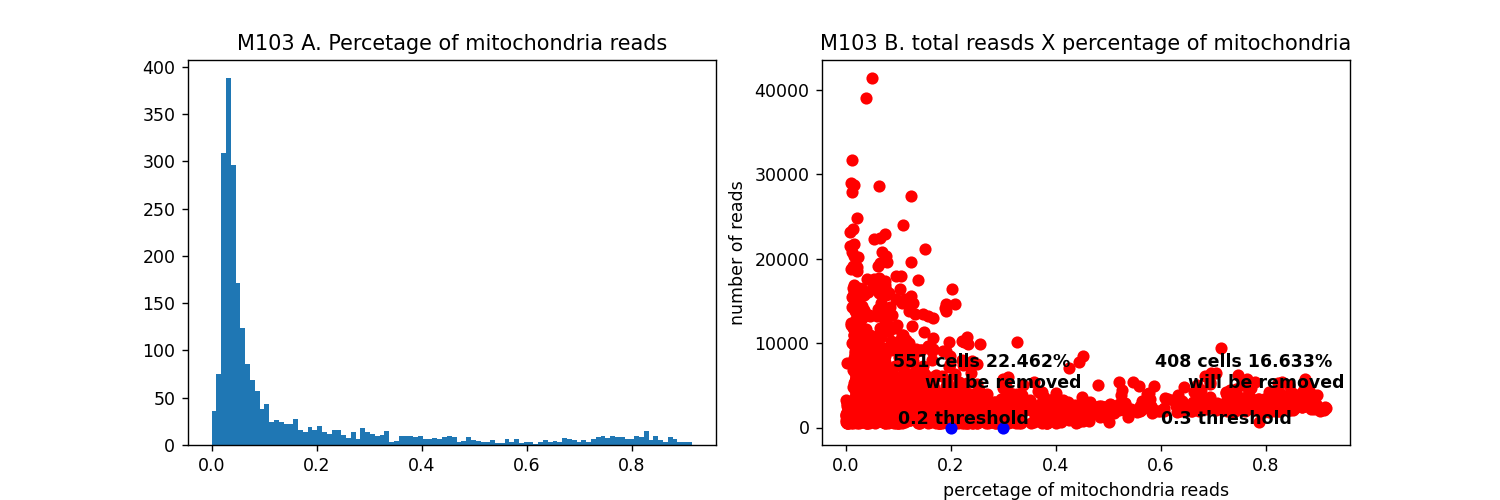

M103
number of cells which their mitochondria genes account more than 20.0% : 551
the portion of cells we would drop: 22.462%
number of cells which their mitochondria genes account more than 30.0% : 408
the portion of cells we would drop: 16.633%


<IPython.core.display.Javascript object>


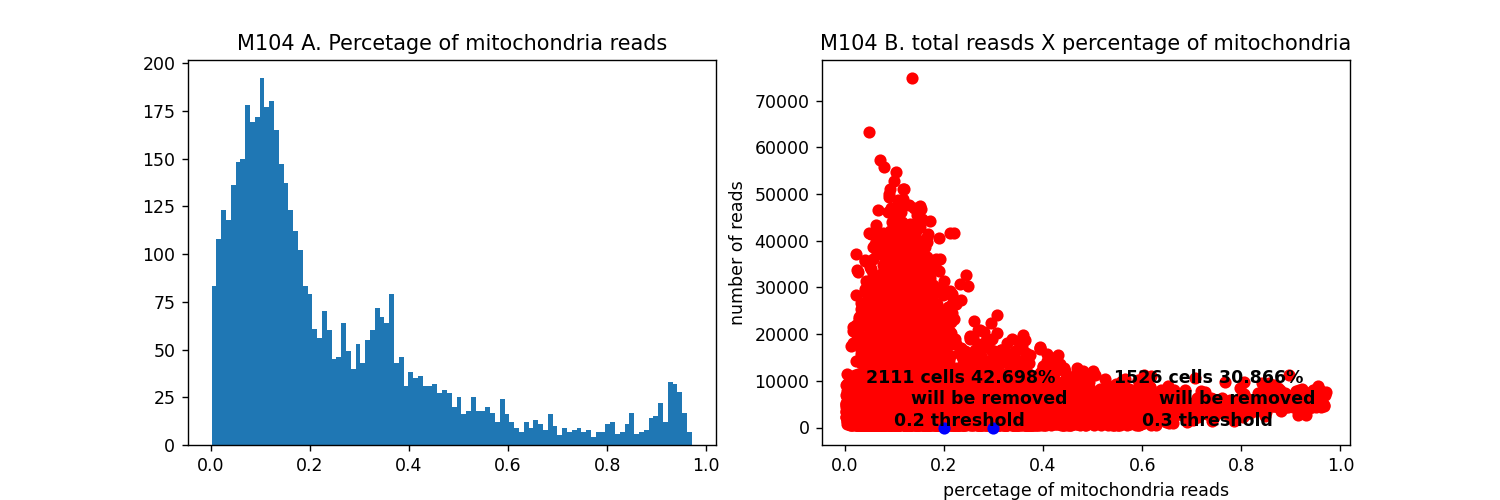

M104
number of cells which their mitochondria genes account more than 20.0% : 2111
the portion of cells we would drop: 42.698%
number of cells which their mitochondria genes account more than 30.0% : 1526
the portion of cells we would drop: 30.866%


<IPython.core.display.Javascript object>


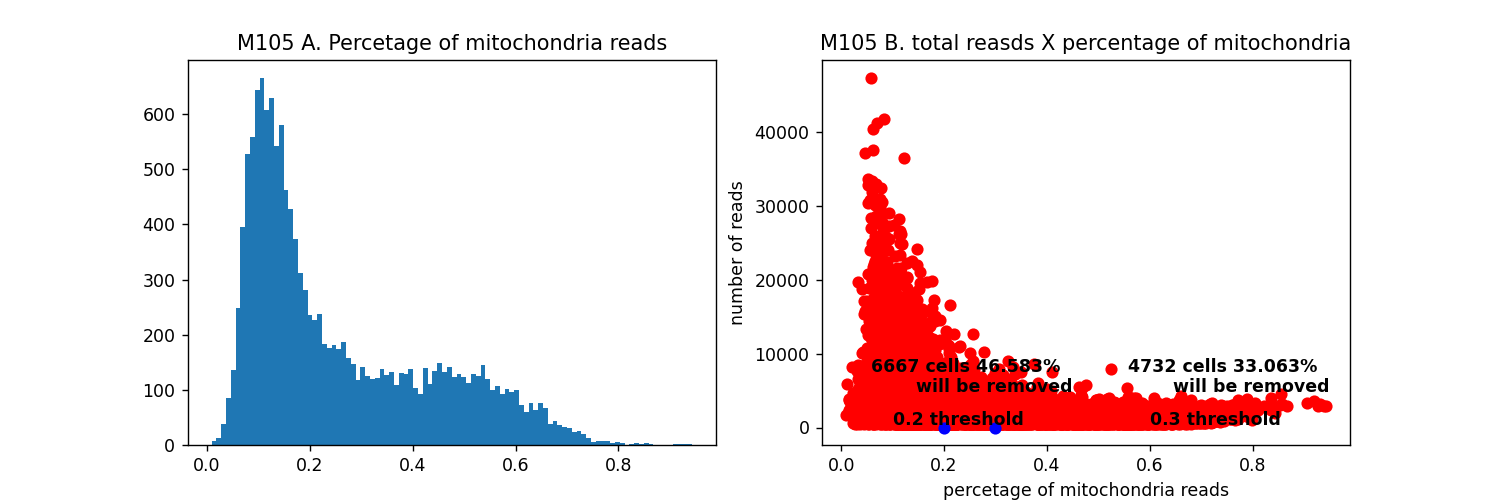

M105
number of cells which their mitochondria genes account more than 20.0% : 6667
the portion of cells we would drop: 46.583%
number of cells which their mitochondria genes account more than 30.0% : 4732
the portion of cells we would drop: 33.063%


<IPython.core.display.Javascript object>


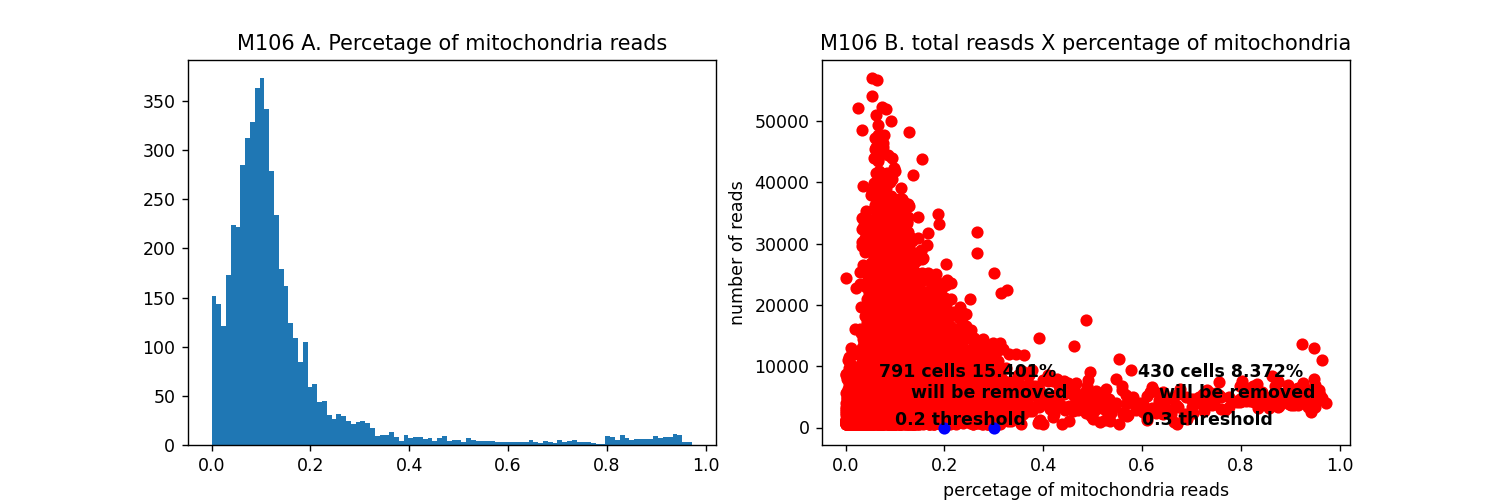

M106
number of cells which their mitochondria genes account more than 20.0% : 791
the portion of cells we would drop: 15.401%
number of cells which their mitochondria genes account more than 30.0% : 430
the portion of cells we would drop: 8.372%


<IPython.core.display.Javascript object>


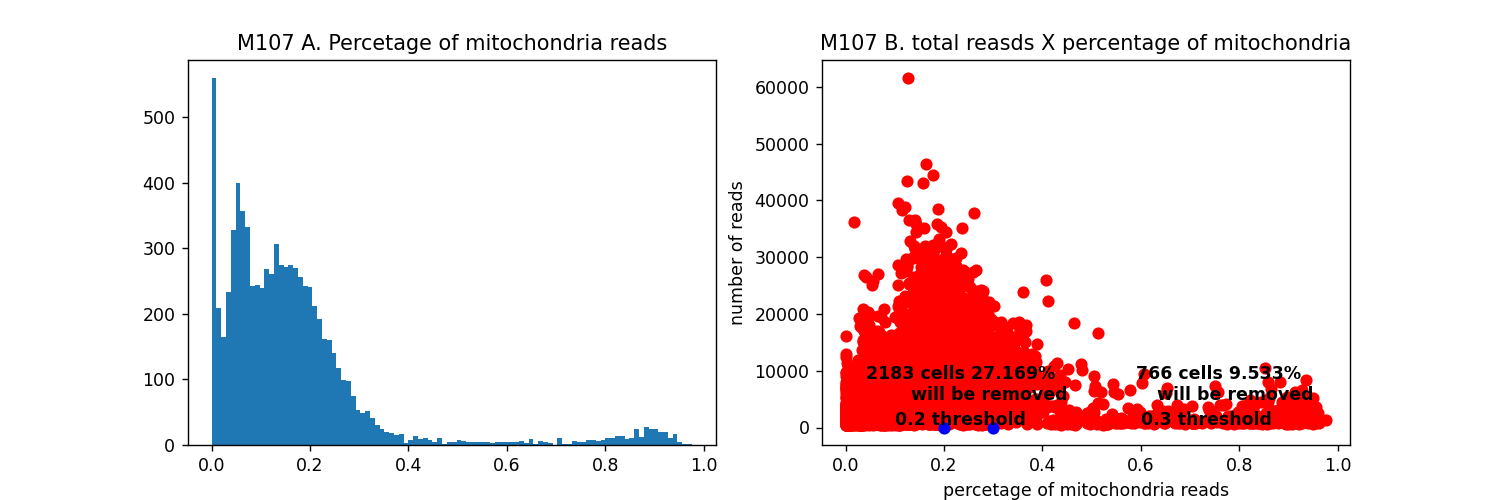

M107
number of cells which their mitochondria genes account more than 20.0% : 2183
the portion of cells we would drop: 27.169%
number of cells which their mitochondria genes account more than 30.0% : 766
the portion of cells we would drop: 9.533%


<IPython.core.display.Javascript object>


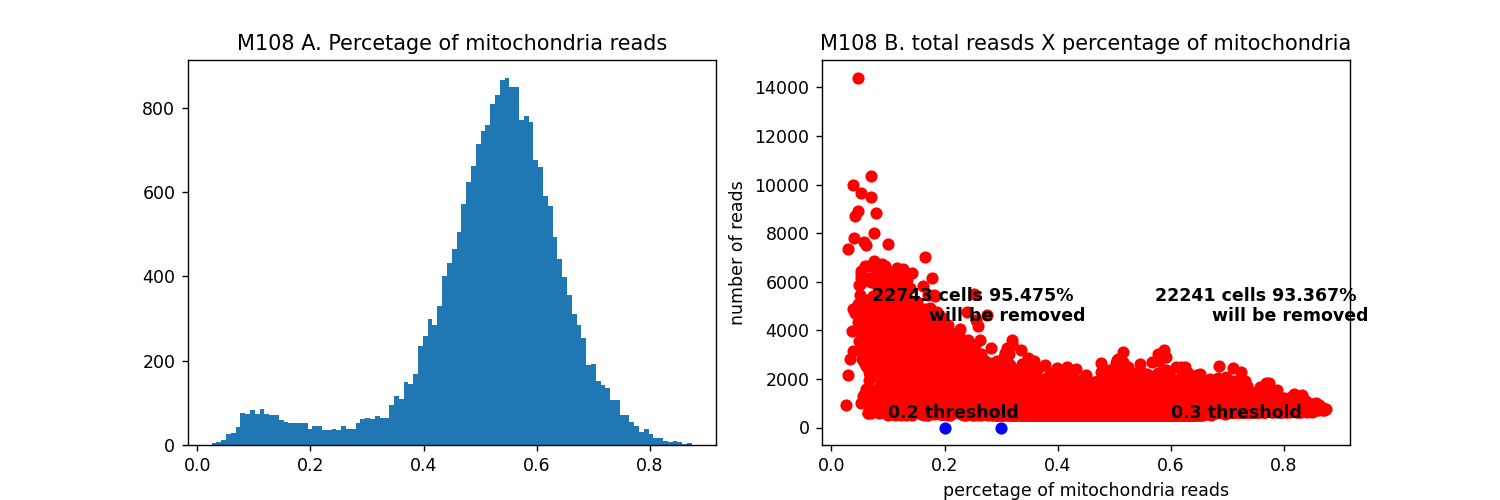

M108
number of cells which their mitochondria genes account more than 20.0% : 22743
the portion of cells we would drop: 95.475%
number of cells which their mitochondria genes account more than 30.0% : 22241
the portion of cells we would drop: 93.367%


<IPython.core.display.Javascript object>


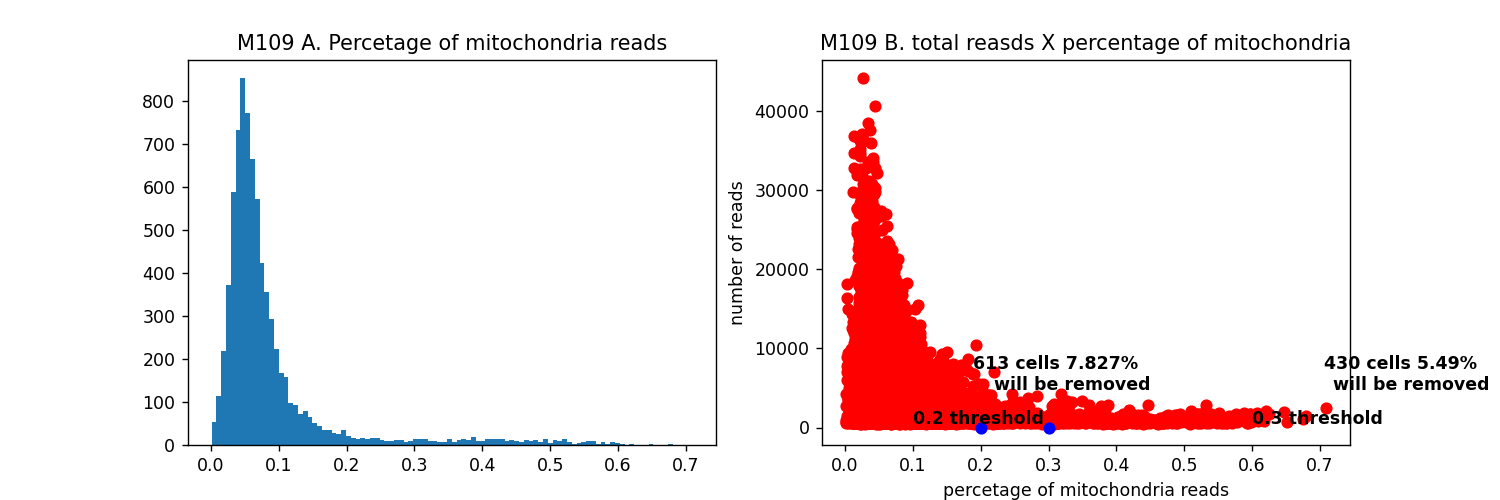

M109
number of cells which their mitochondria genes account more than 20.0% : 613
the portion of cells we would drop: 7.827%
number of cells which their mitochondria genes account more than 30.0% : 430
the portion of cells we would drop: 5.49%


<IPython.core.display.Javascript object>


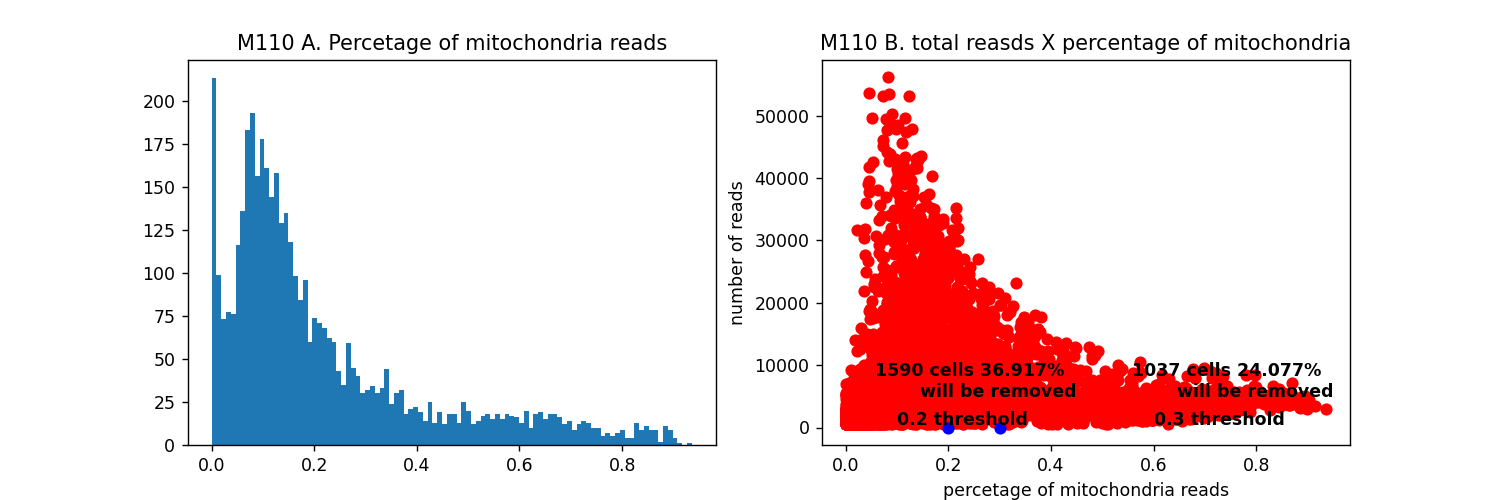

M110
number of cells which their mitochondria genes account more than 20.0% : 1590
the portion of cells we would drop: 36.917%
number of cells which their mitochondria genes account more than 30.0% : 1037
the portion of cells we would drop: 24.077%


<IPython.core.display.Javascript object>


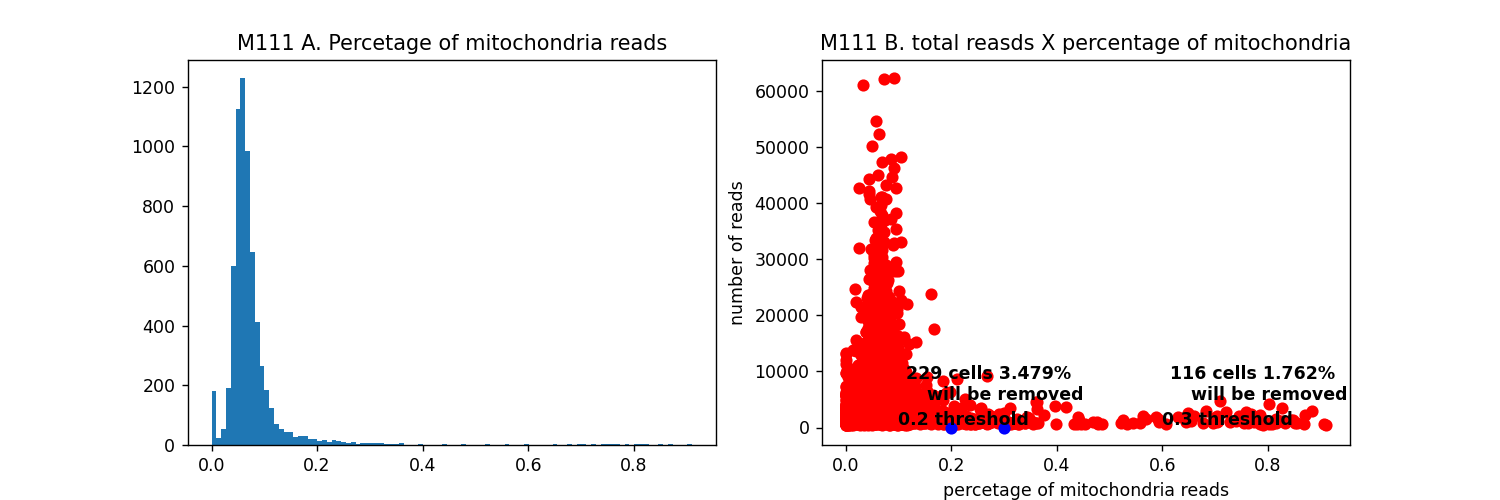

M111
number of cells which their mitochondria genes account more than 20.0% : 229
the portion of cells we would drop: 3.479%
number of cells which their mitochondria genes account more than 30.0% : 116
the portion of cells we would drop: 1.762%


<IPython.core.display.Javascript object>


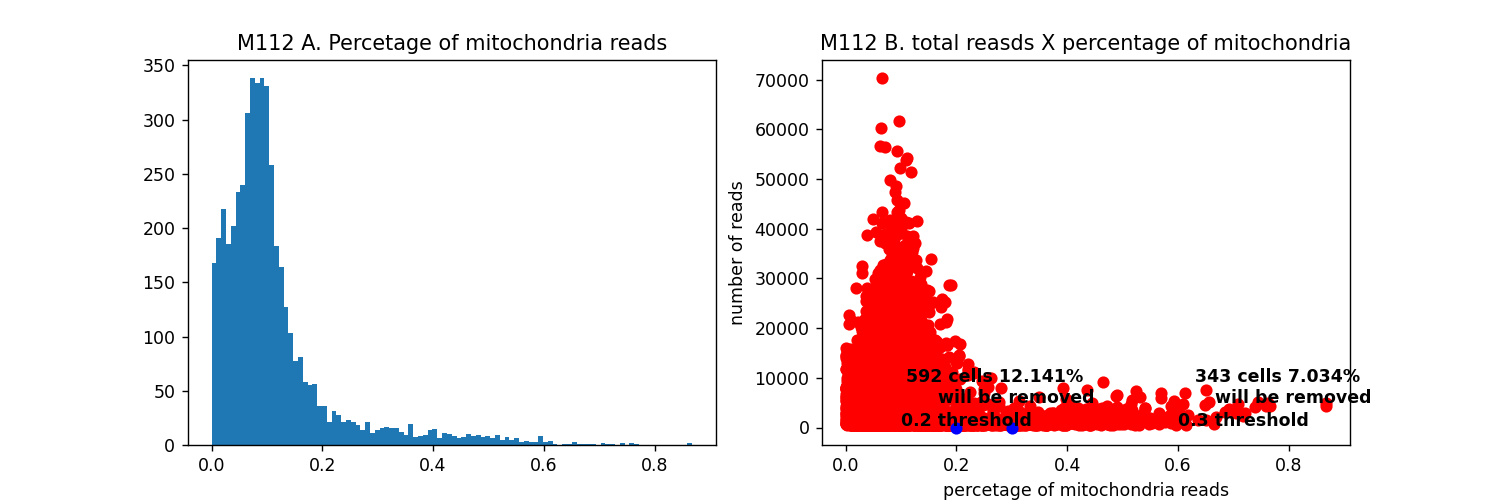

M112
number of cells which their mitochondria genes account more than 20.0% : 592
the portion of cells we would drop: 12.141%
number of cells which their mitochondria genes account more than 30.0% : 343
the portion of cells we would drop: 7.034%


<IPython.core.display.Javascript object>


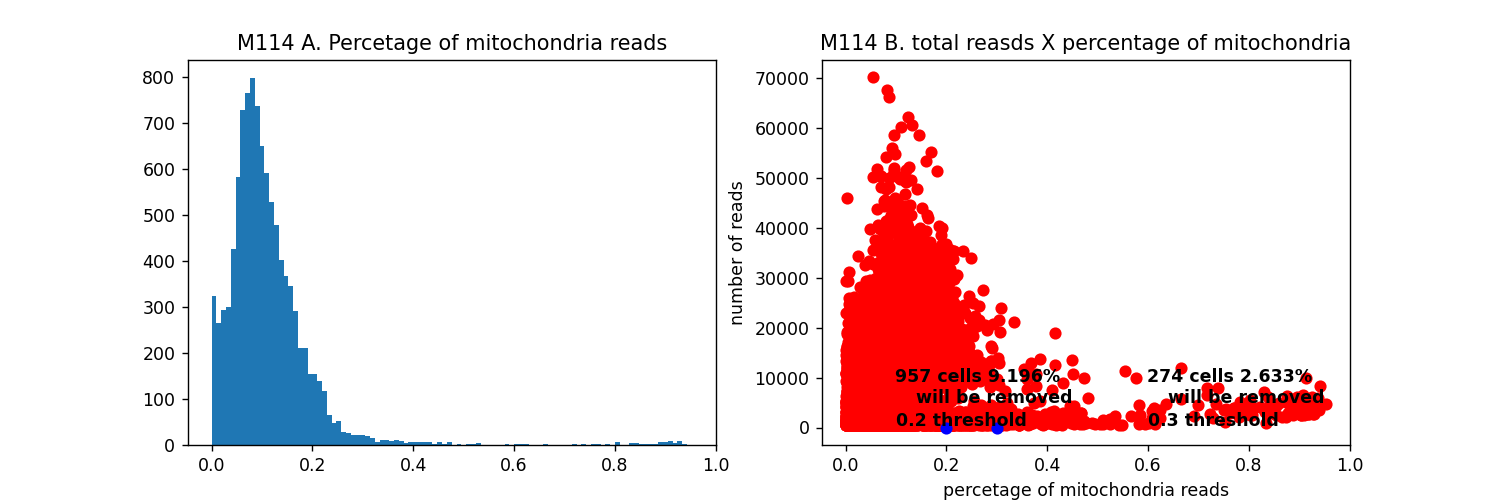

M114
number of cells which their mitochondria genes account more than 20.0% : 957
the portion of cells we would drop: 9.196%
number of cells which their mitochondria genes account more than 30.0% : 274
the portion of cells we would drop: 2.633%


<IPython.core.display.Javascript object>


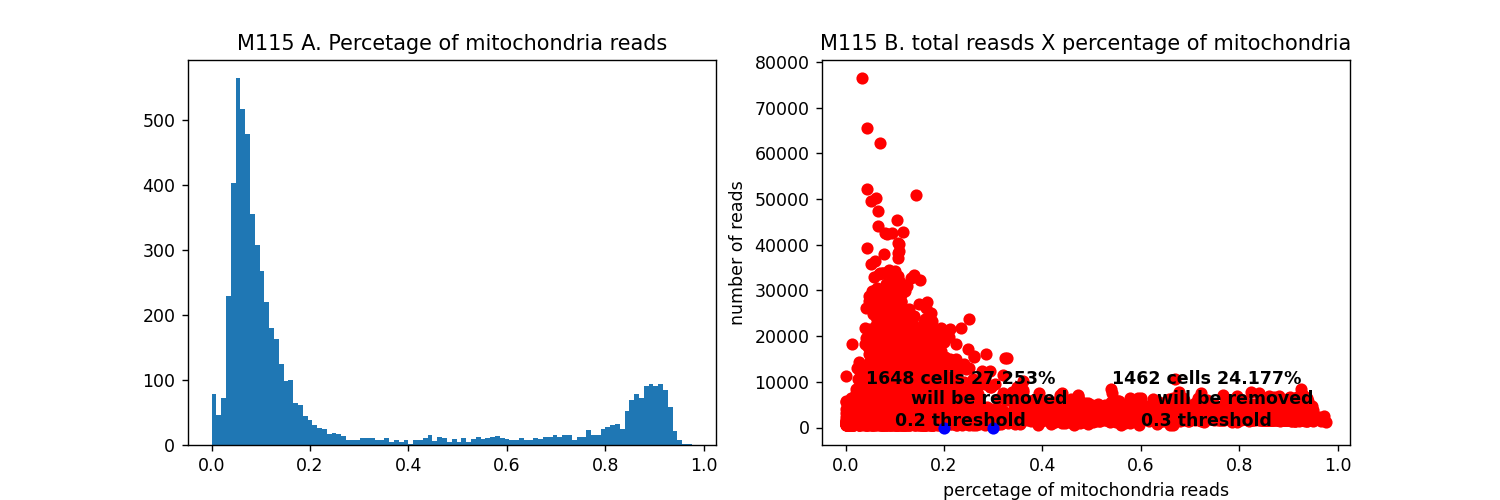

M115
number of cells which their mitochondria genes account more than 20.0% : 1648
the portion of cells we would drop: 27.253%
number of cells which their mitochondria genes account more than 30.0% : 1462
the portion of cells we would drop: 24.177%


<IPython.core.display.Javascript object>


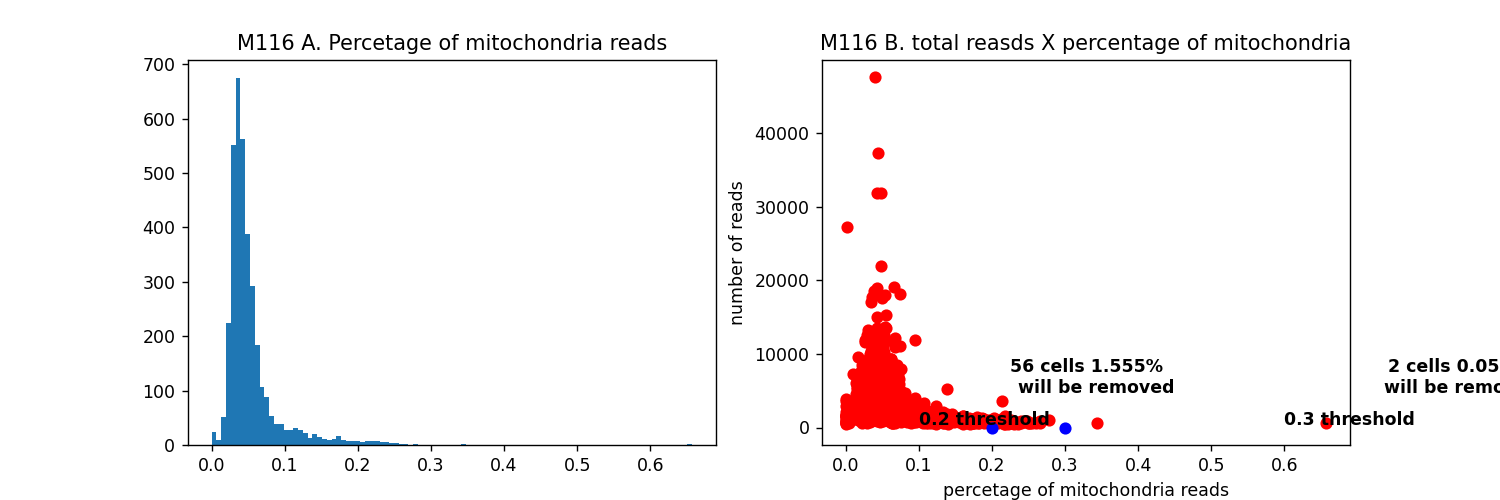

M116
number of cells which their mitochondria genes account more than 20.0% : 56
the portion of cells we would drop: 1.555%
number of cells which their mitochondria genes account more than 30.0% : 2
the portion of cells we would drop: 0.056%


<IPython.core.display.Javascript object>


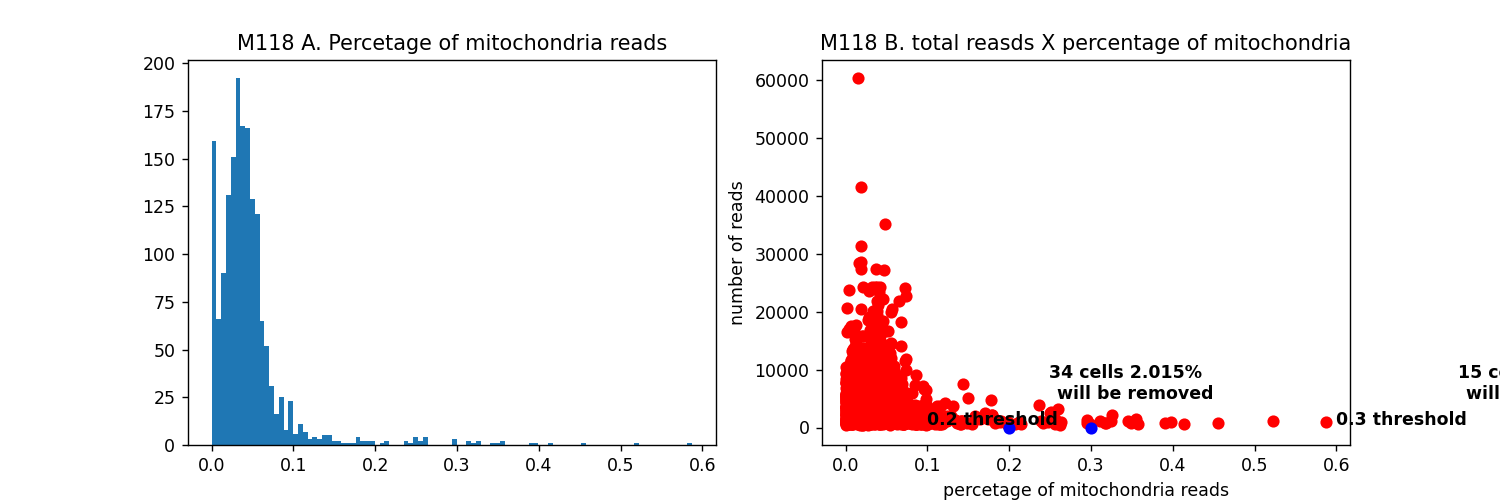

M118
number of cells which their mitochondria genes account more than 20.0% : 34
the portion of cells we would drop: 2.015%
number of cells which their mitochondria genes account more than 30.0% : 15
the portion of cells we would drop: 0.889%


<IPython.core.display.Javascript object>


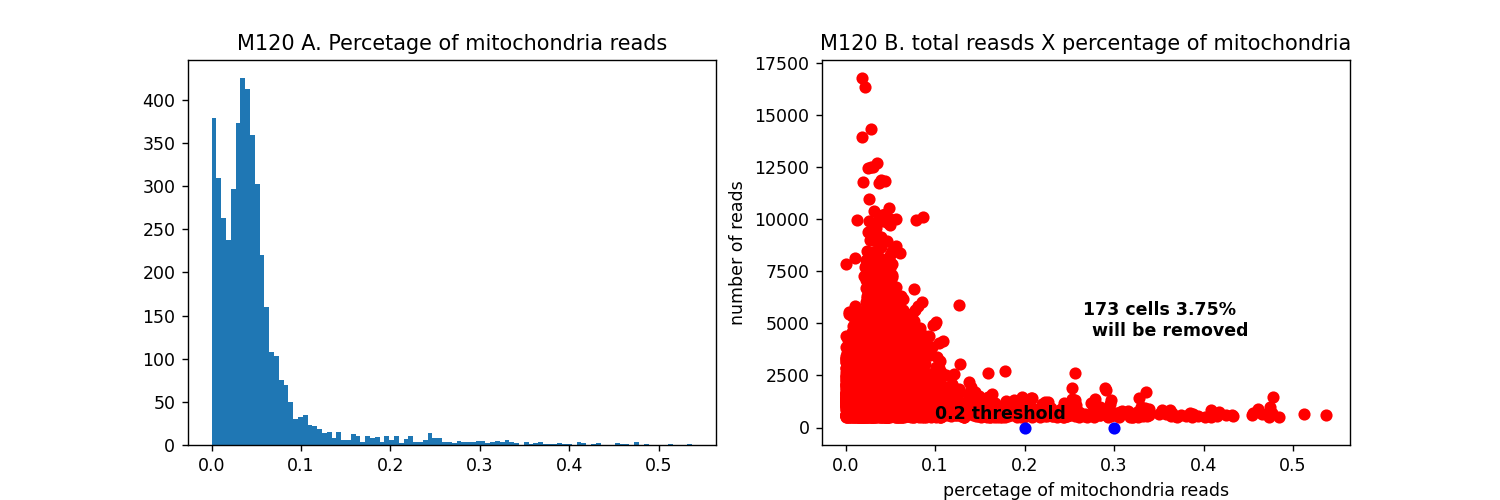

M120
number of cells which their mitochondria genes account more than 20.0% : 173
the portion of cells we would drop: 3.75%
number of cells which their mitochondria genes account more than 30.0% : 64
the portion of cells we would drop: 1.387%


<IPython.core.display.Javascript object>


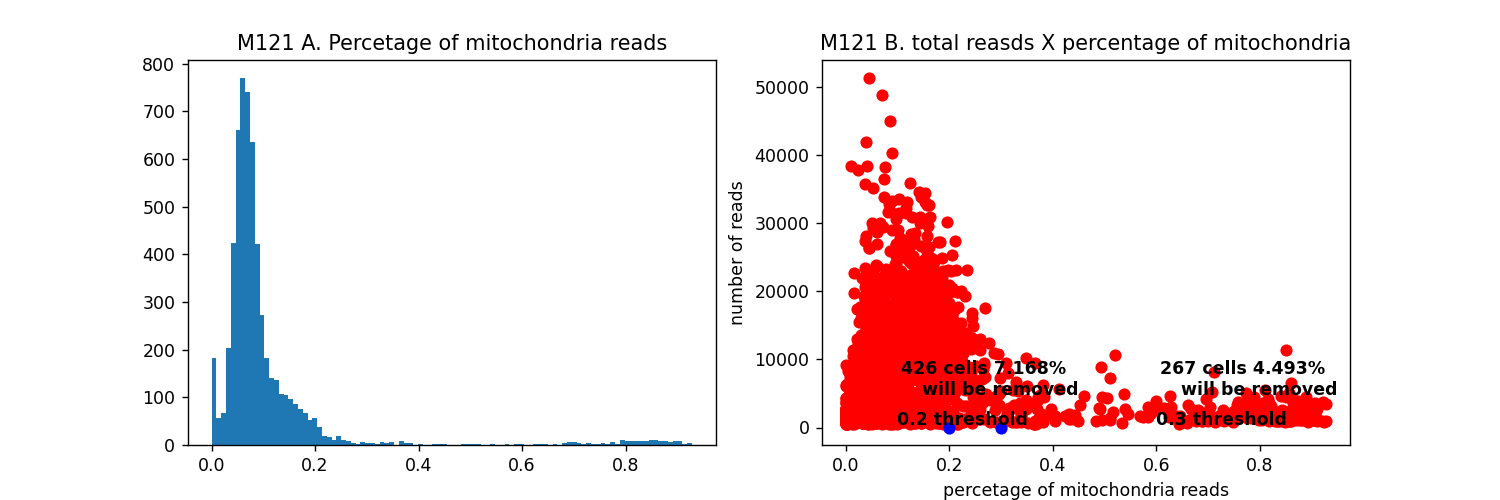

M121
number of cells which their mitochondria genes account more than 20.0% : 426
the portion of cells we would drop: 7.168%
number of cells which their mitochondria genes account more than 30.0% : 267
the portion of cells we would drop: 4.493%


<IPython.core.display.Javascript object>


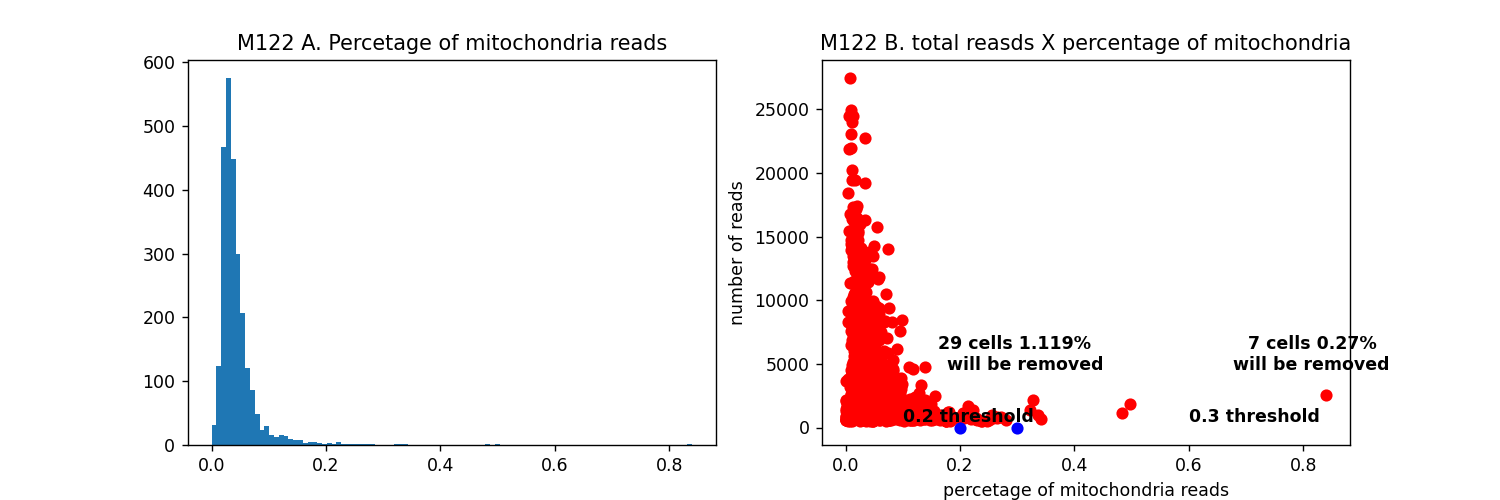

M122
number of cells which their mitochondria genes account more than 20.0% : 29
the portion of cells we would drop: 1.119%
number of cells which their mitochondria genes account more than 30.0% : 7
the portion of cells we would drop: 0.27%


<ipython-input-38-eee920e9ce03>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2)


<IPython.core.display.Javascript object>


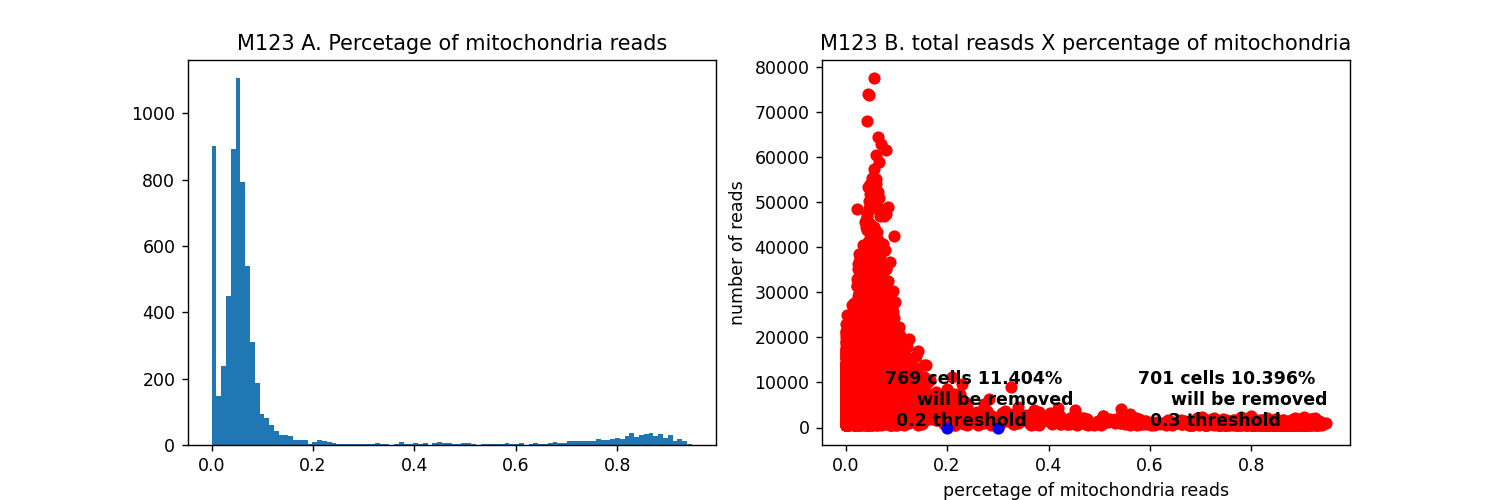

M123
number of cells which their mitochondria genes account more than 20.0% : 769
the portion of cells we would drop: 11.404%
number of cells which their mitochondria genes account more than 30.0% : 701
the portion of cells we would drop: 10.396%


<ipython-input-38-eee920e9ce03>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2)


<IPython.core.display.Javascript object>


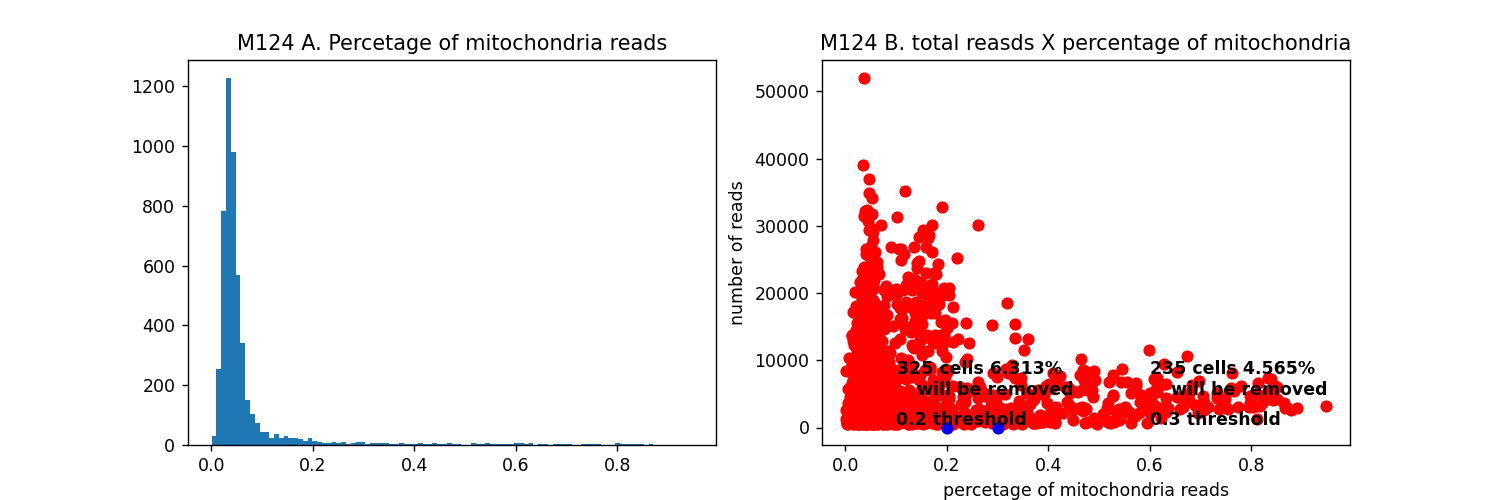

M124
number of cells which their mitochondria genes account more than 20.0% : 325
the portion of cells we would drop: 6.313%
number of cells which their mitochondria genes account more than 30.0% : 235
the portion of cells we would drop: 4.565%


<ipython-input-38-eee920e9ce03>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2)


<IPython.core.display.Javascript object>


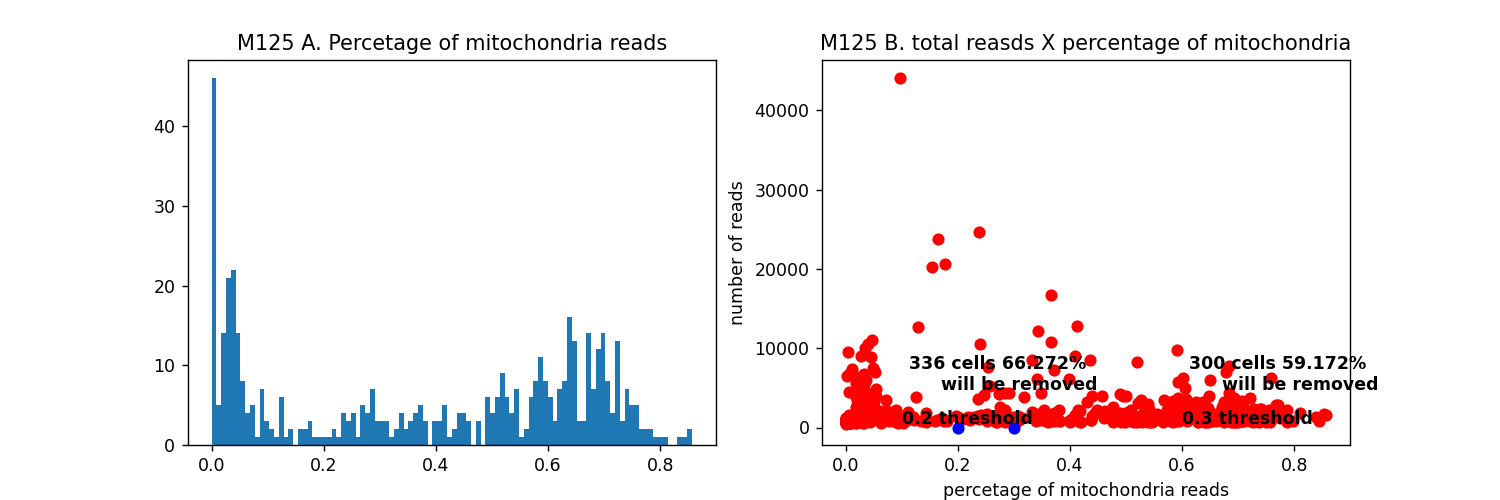

M125
number of cells which their mitochondria genes account more than 20.0% : 336
the portion of cells we would drop: 66.272%
number of cells which their mitochondria genes account more than 30.0% : 300
the portion of cells we would drop: 59.172%


<ipython-input-38-eee920e9ce03>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2)


<IPython.core.display.Javascript object>


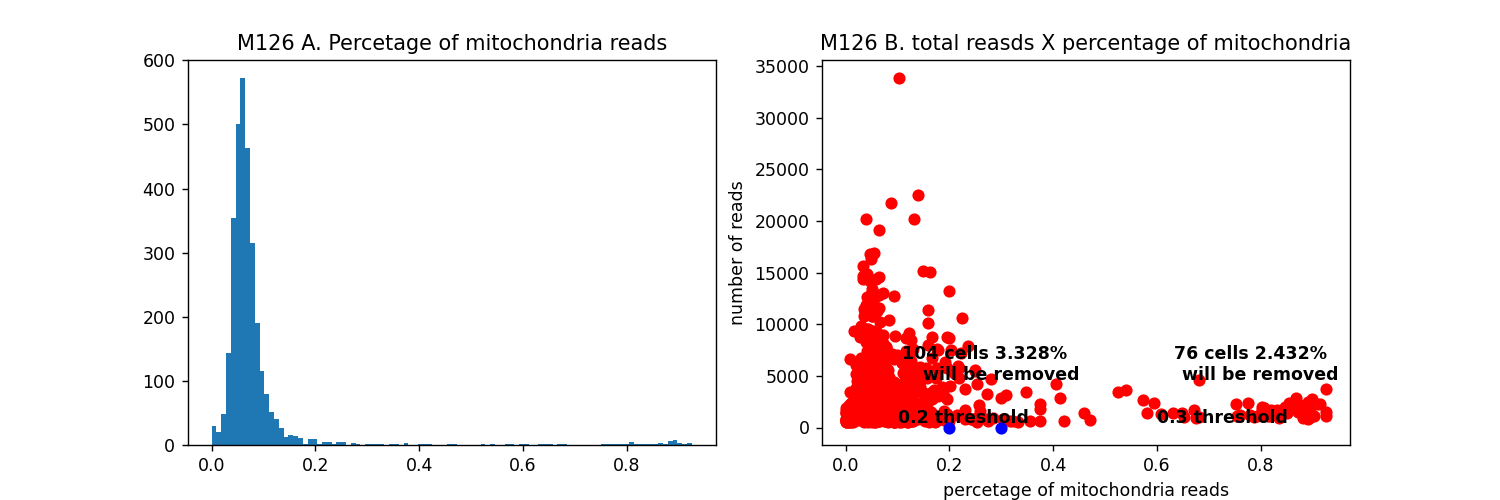

M126
number of cells which their mitochondria genes account more than 20.0% : 104
the portion of cells we would drop: 3.328%
number of cells which their mitochondria genes account more than 30.0% : 76
the portion of cells we would drop: 2.432%


<ipython-input-38-eee920e9ce03>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2)


<IPython.core.display.Javascript object>


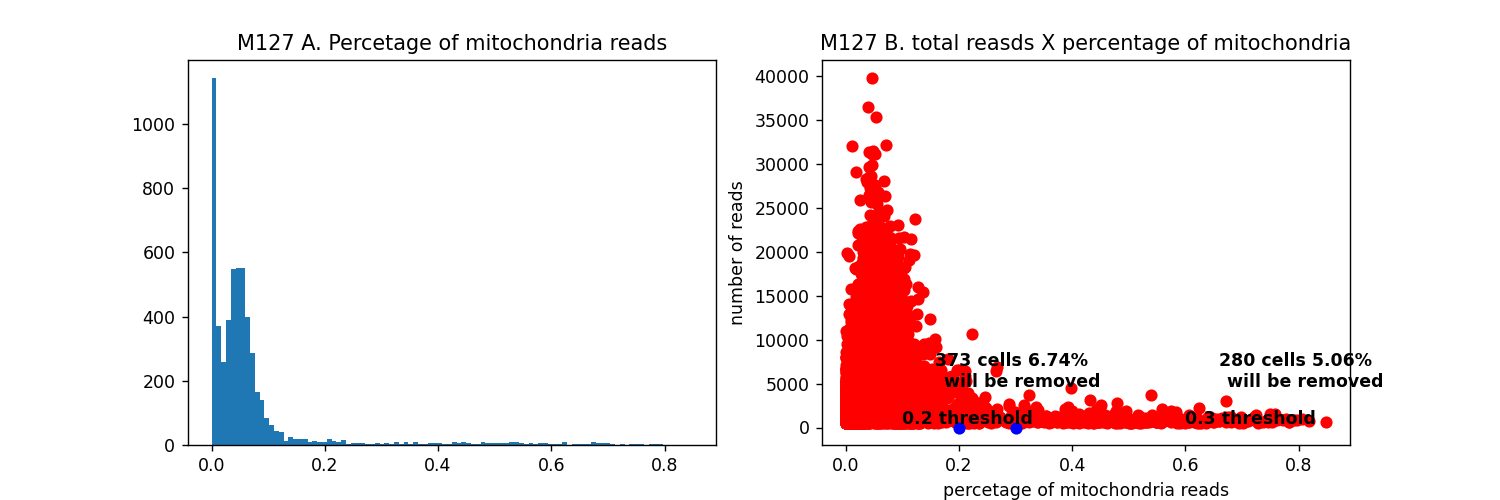

M127
number of cells which their mitochondria genes account more than 20.0% : 373
the portion of cells we would drop: 6.74%
number of cells which their mitochondria genes account more than 30.0% : 280
the portion of cells we would drop: 5.06%


<ipython-input-38-eee920e9ce03>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2)


<IPython.core.display.Javascript object>


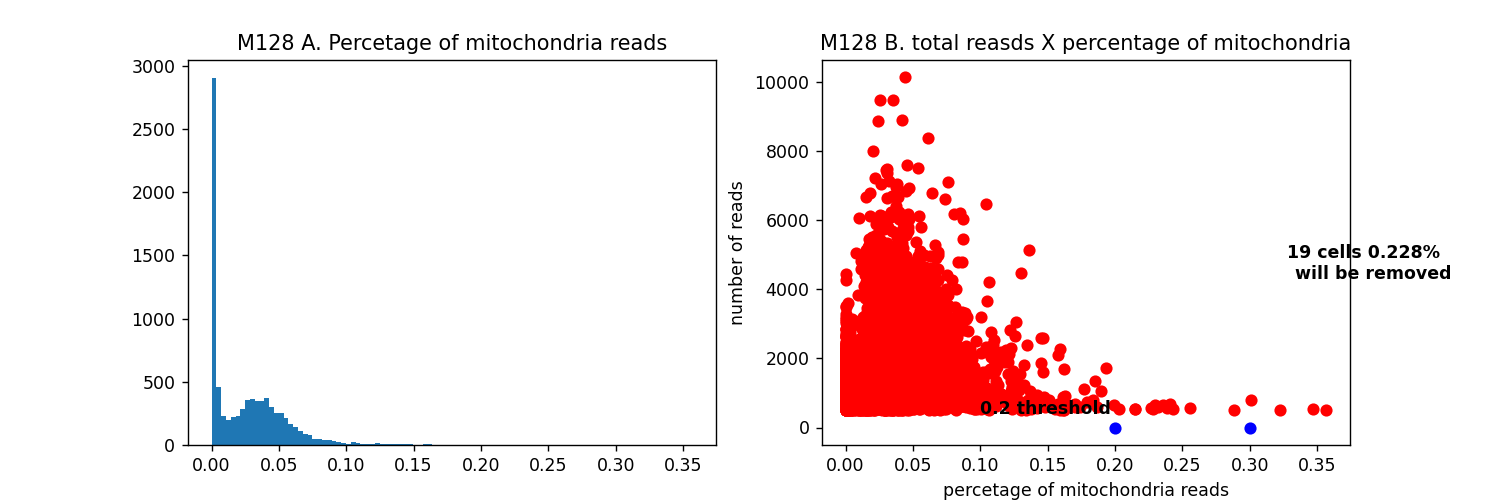

M128
number of cells which their mitochondria genes account more than 20.0% : 19
the portion of cells we would drop: 0.228%
number of cells which their mitochondria genes account more than 30.0% : 4
the portion of cells we would drop: 0.048%


<ipython-input-38-eee920e9ce03>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2)


<IPython.core.display.Javascript object>


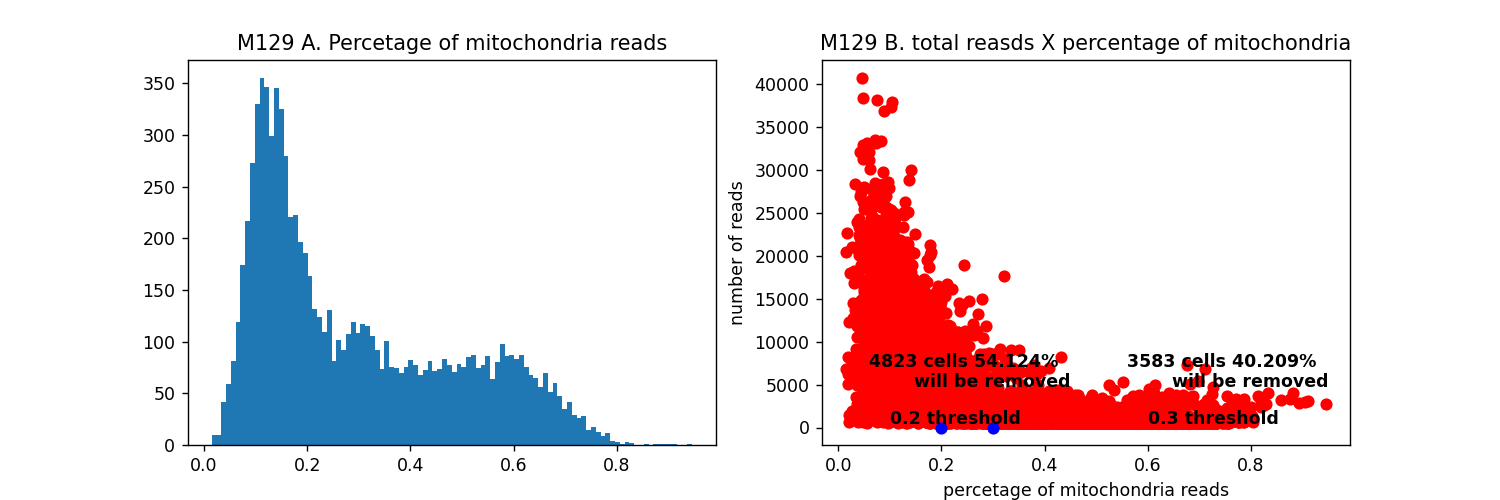

M129
number of cells which their mitochondria genes account more than 20.0% : 4823
the portion of cells we would drop: 54.124%
number of cells which their mitochondria genes account more than 30.0% : 3583
the portion of cells we would drop: 40.209%


<ipython-input-38-eee920e9ce03>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2)


<IPython.core.display.Javascript object>


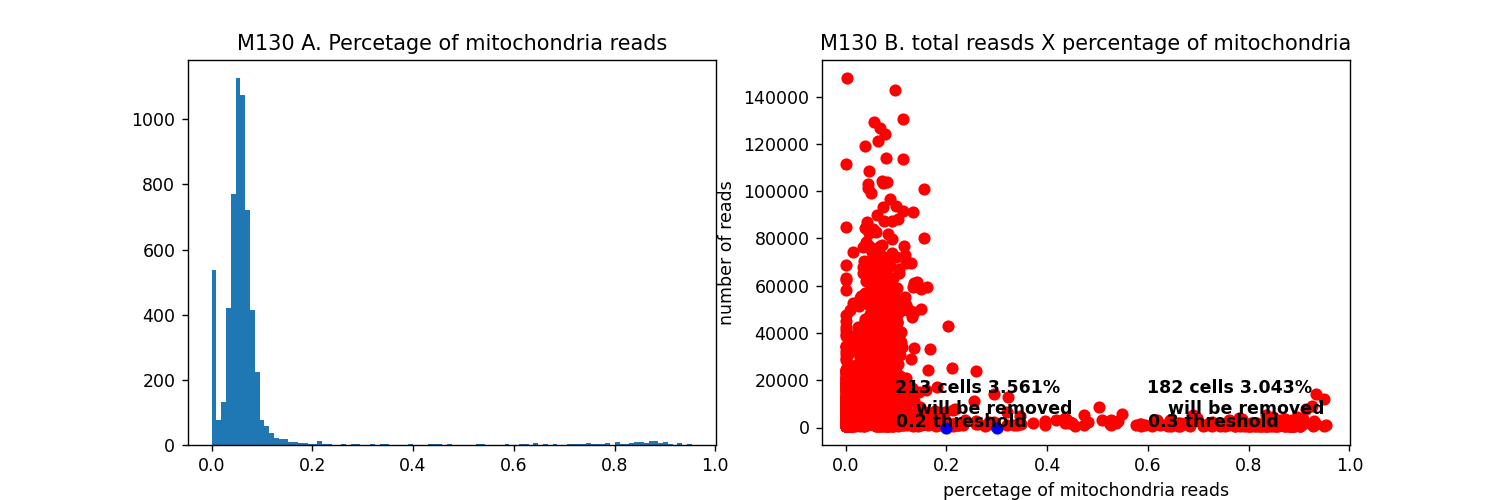

M130
number of cells which their mitochondria genes account more than 20.0% : 213
the portion of cells we would drop: 3.561%
number of cells which their mitochondria genes account more than 30.0% : 182
the portion of cells we would drop: 3.043%


<ipython-input-38-eee920e9ce03>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2)


<IPython.core.display.Javascript object>


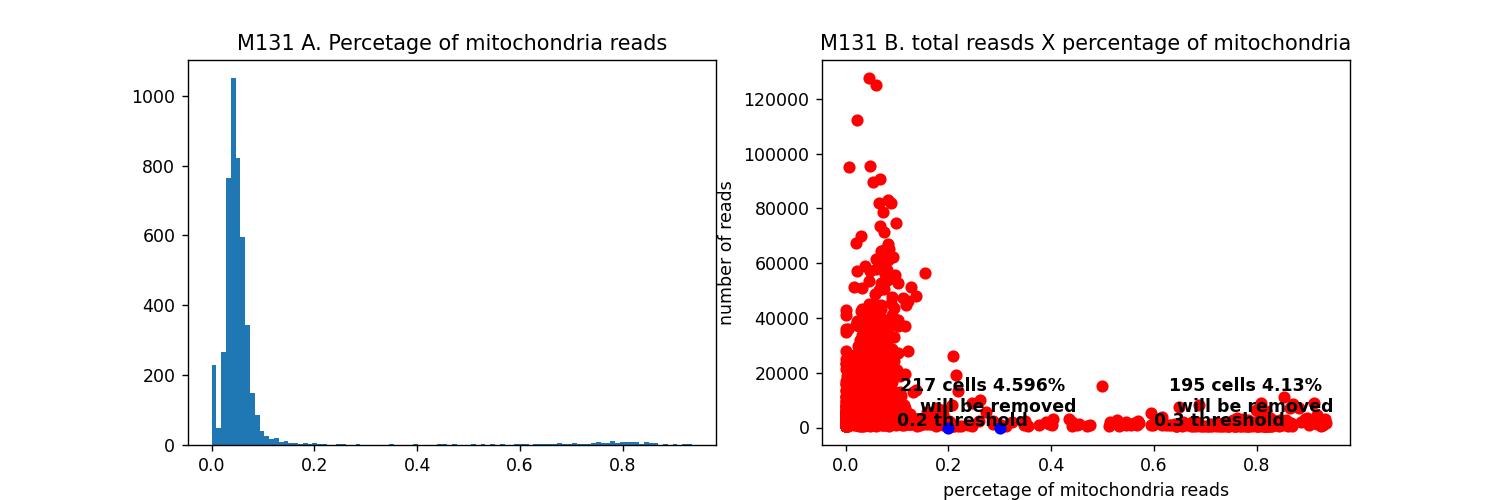

M131
number of cells which their mitochondria genes account more than 20.0% : 217
the portion of cells we would drop: 4.596%
number of cells which their mitochondria genes account more than 30.0% : 195
the portion of cells we would drop: 4.13%


<ipython-input-38-eee920e9ce03>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2)


<IPython.core.display.Javascript object>


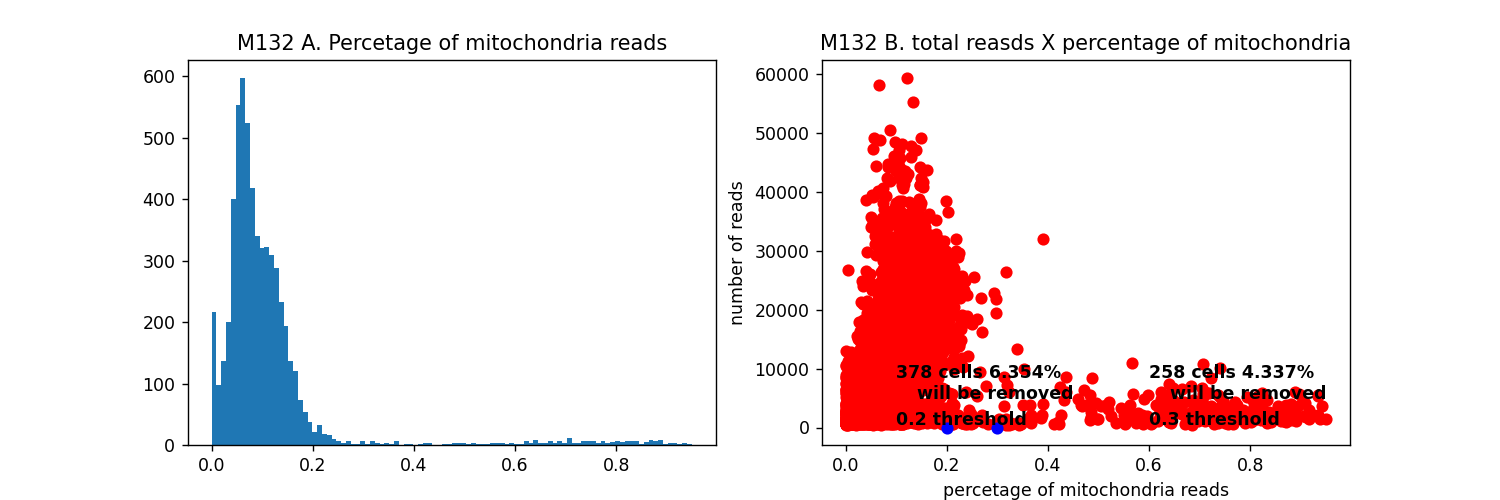

M132
number of cells which their mitochondria genes account more than 20.0% : 378
the portion of cells we would drop: 6.354%
number of cells which their mitochondria genes account more than 30.0% : 258
the portion of cells we would drop: 4.337%


<ipython-input-38-eee920e9ce03>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2)


<IPython.core.display.Javascript object>


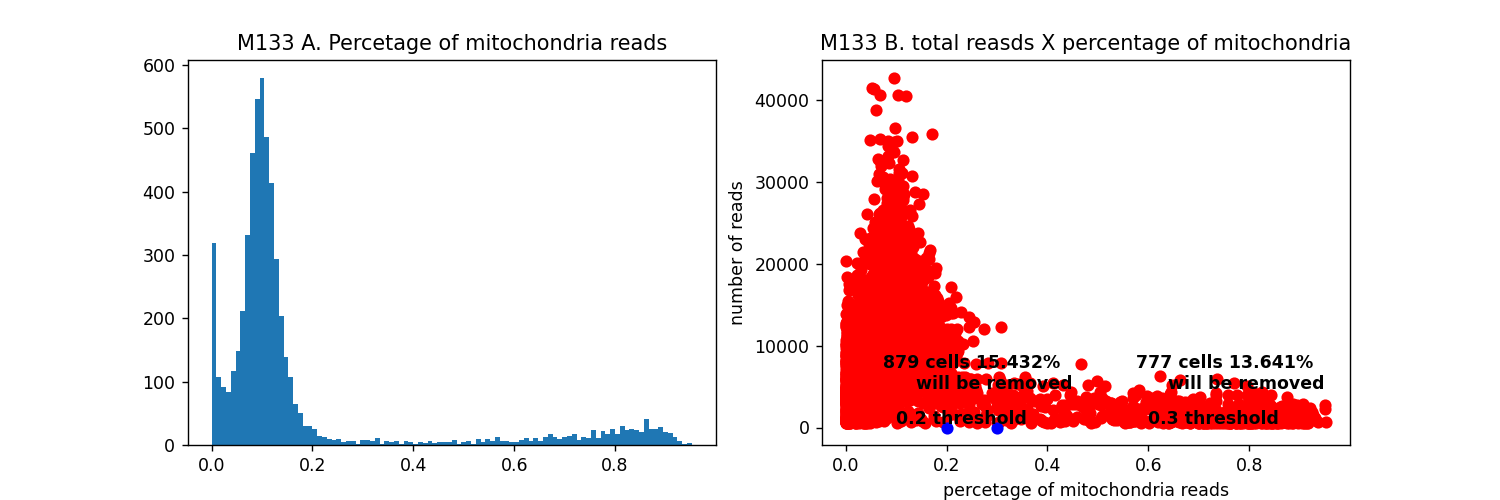

M133
number of cells which their mitochondria genes account more than 20.0% : 879
the portion of cells we would drop: 15.432%
number of cells which their mitochondria genes account more than 30.0% : 777
the portion of cells we would drop: 13.641%


<ipython-input-38-eee920e9ce03>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2)


<IPython.core.display.Javascript object>


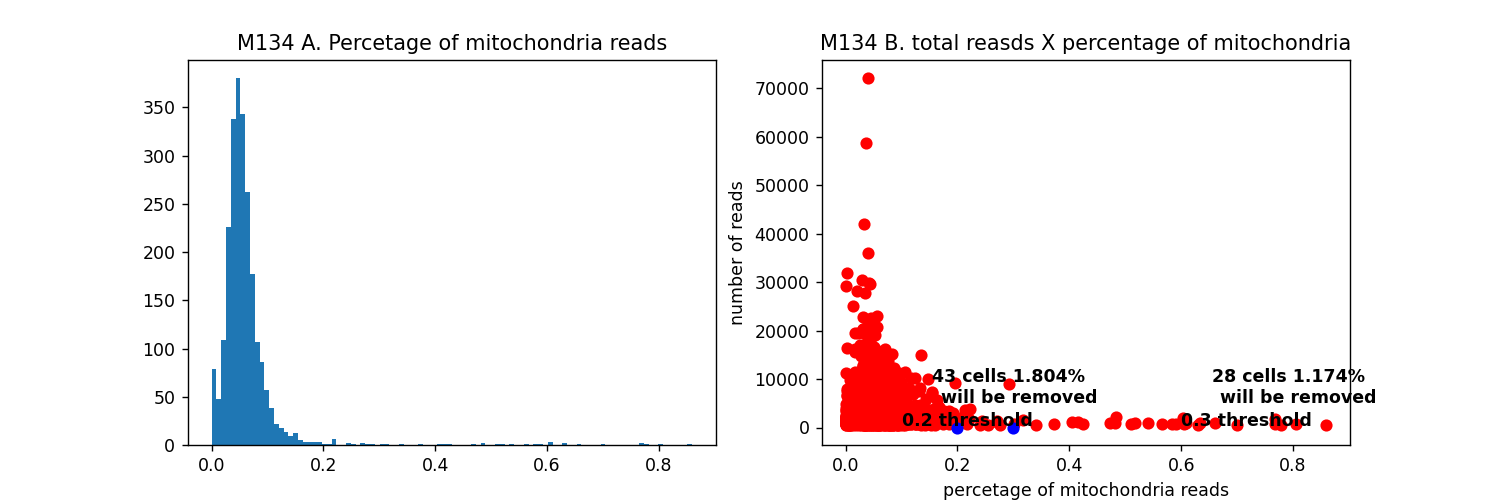

M134
number of cells which their mitochondria genes account more than 20.0% : 43
the portion of cells we would drop: 1.804%
number of cells which their mitochondria genes account more than 30.0% : 28
the portion of cells we would drop: 1.174%


<ipython-input-38-eee920e9ce03>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2)


<IPython.core.display.Javascript object>


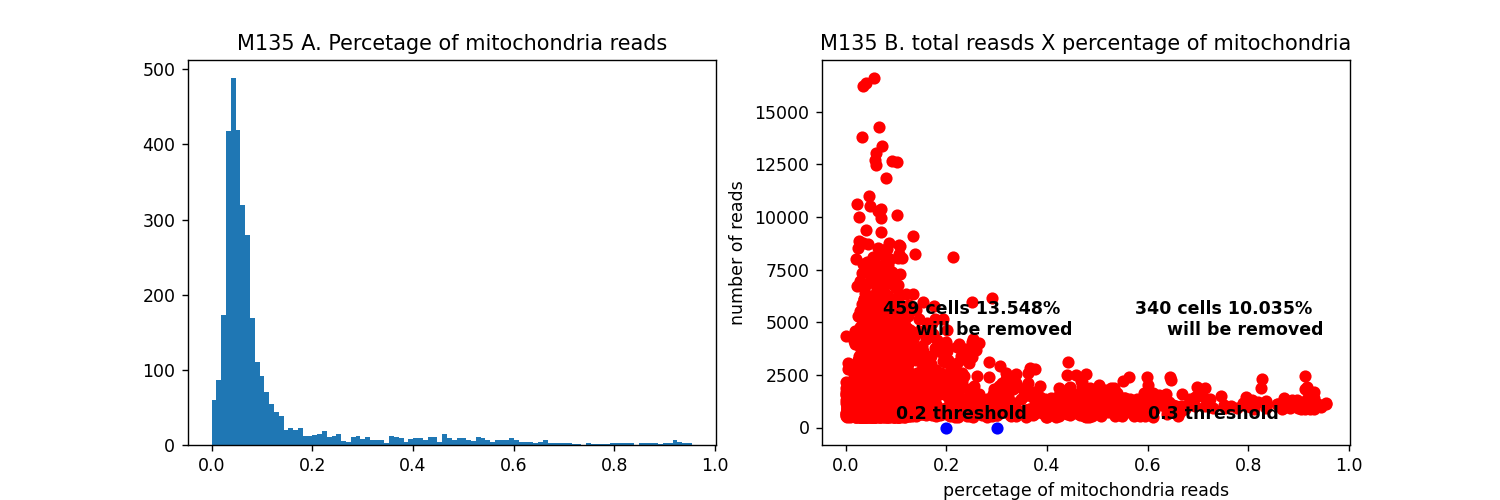

M135
number of cells which their mitochondria genes account more than 20.0% : 459
the portion of cells we would drop: 13.548%
number of cells which their mitochondria genes account more than 30.0% : 340
the portion of cells we would drop: 10.035%


<ipython-input-38-eee920e9ce03>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2)


<IPython.core.display.Javascript object>


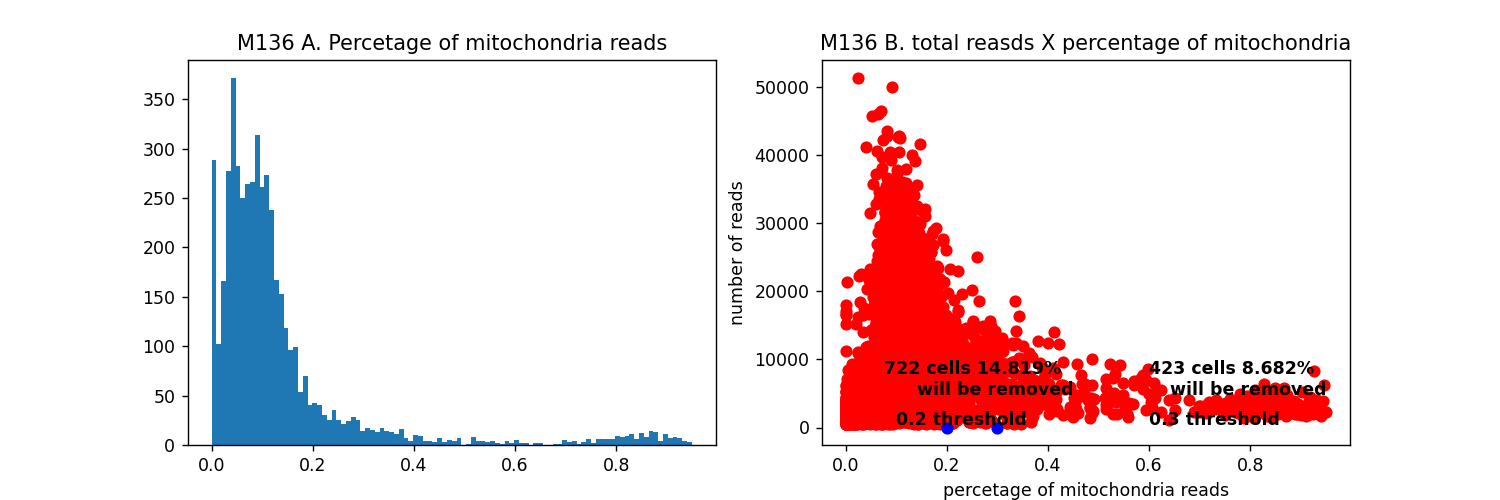

M136
number of cells which their mitochondria genes account more than 20.0% : 722
the portion of cells we would drop: 14.819%
number of cells which their mitochondria genes account more than 30.0% : 423
the portion of cells we would drop: 8.682%


<ipython-input-38-eee920e9ce03>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2)


<IPython.core.display.Javascript object>


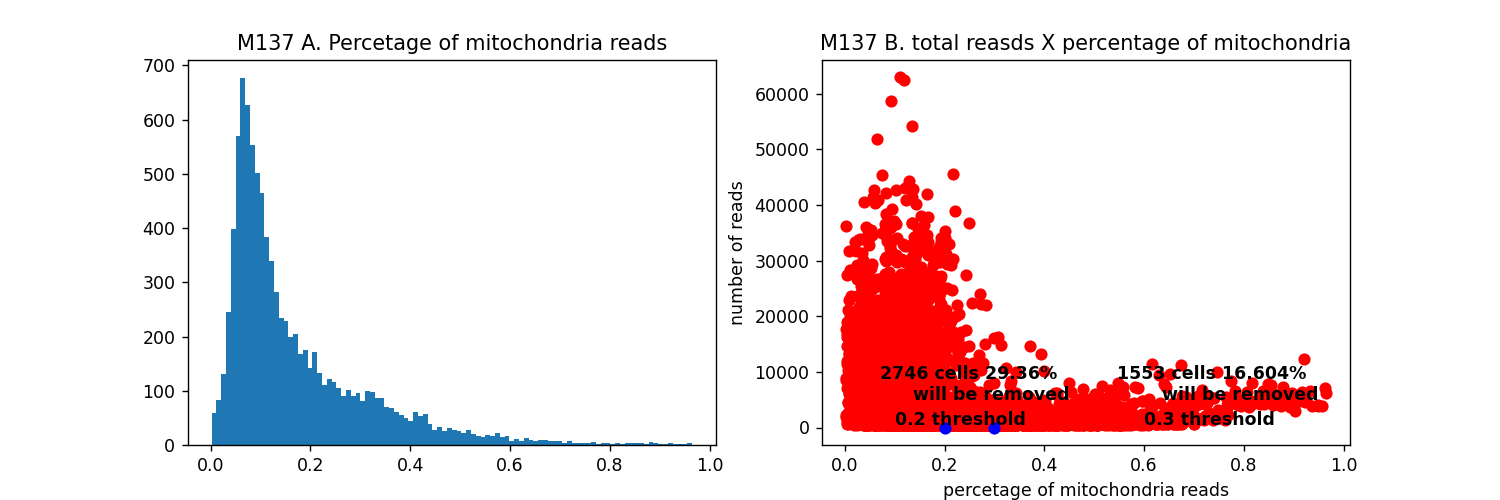

M137
number of cells which their mitochondria genes account more than 20.0% : 2746
the portion of cells we would drop: 29.36%
number of cells which their mitochondria genes account more than 30.0% : 1553
the portion of cells we would drop: 16.604%


<ipython-input-38-eee920e9ce03>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2)


<IPython.core.display.Javascript object>


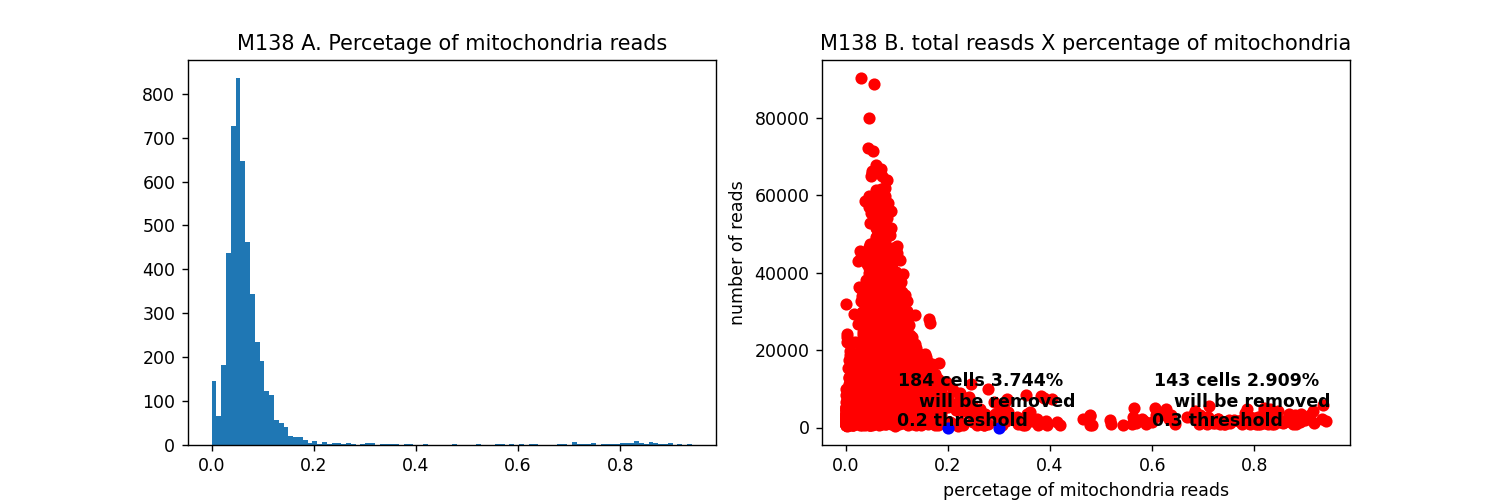

M138
number of cells which their mitochondria genes account more than 20.0% : 184
the portion of cells we would drop: 3.744%
number of cells which their mitochondria genes account more than 30.0% : 143
the portion of cells we would drop: 2.909%


<ipython-input-38-eee920e9ce03>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2)


<IPython.core.display.Javascript object>


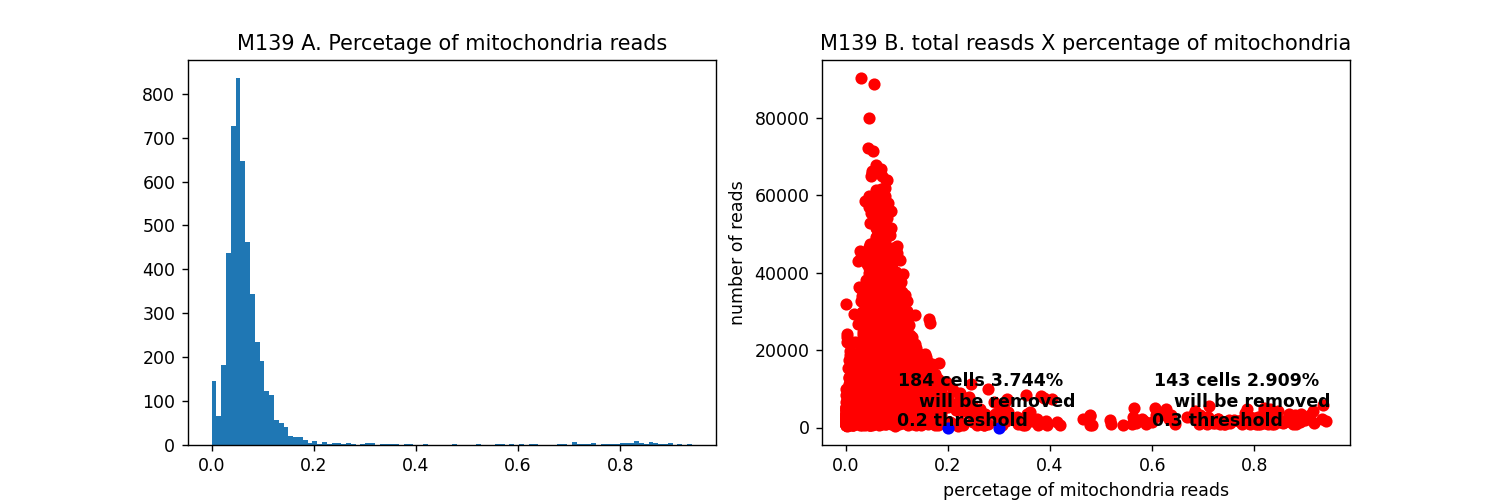

M139
number of cells which their mitochondria genes account more than 20.0% : 184
the portion of cells we would drop: 3.744%
number of cells which their mitochondria genes account more than 30.0% : 143
the portion of cells we would drop: 2.909%


<ipython-input-38-eee920e9ce03>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2)


<IPython.core.display.Javascript object>


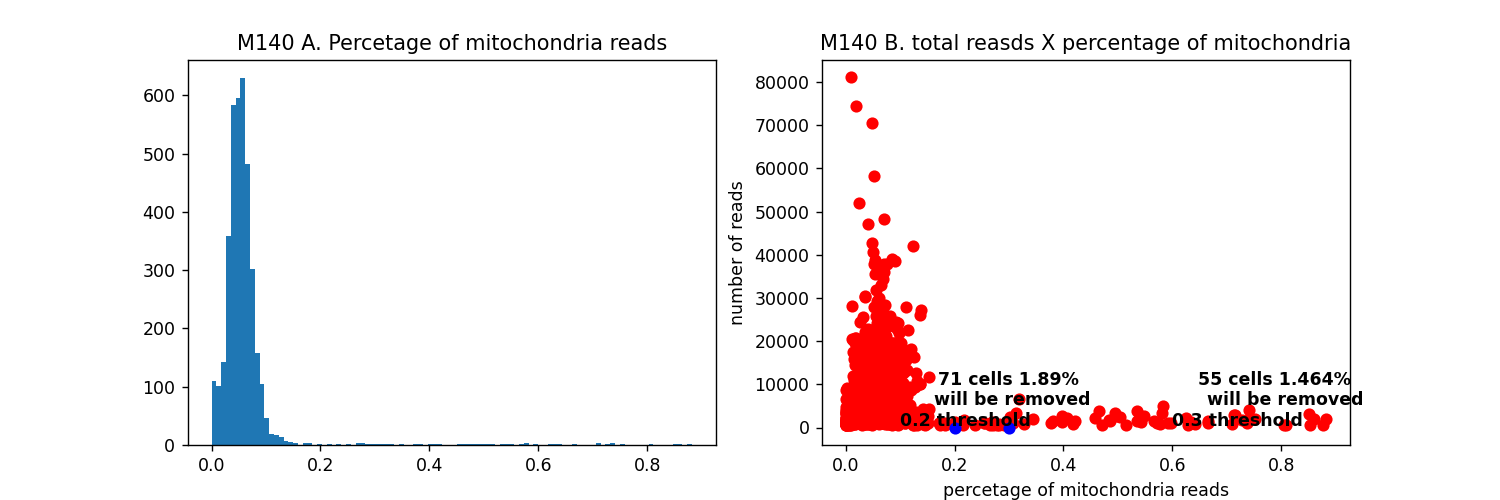

M140
number of cells which their mitochondria genes account more than 20.0% : 71
the portion of cells we would drop: 1.89%
number of cells which their mitochondria genes account more than 30.0% : 55
the portion of cells we would drop: 1.464%


<ipython-input-38-eee920e9ce03>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2)


<IPython.core.display.Javascript object>


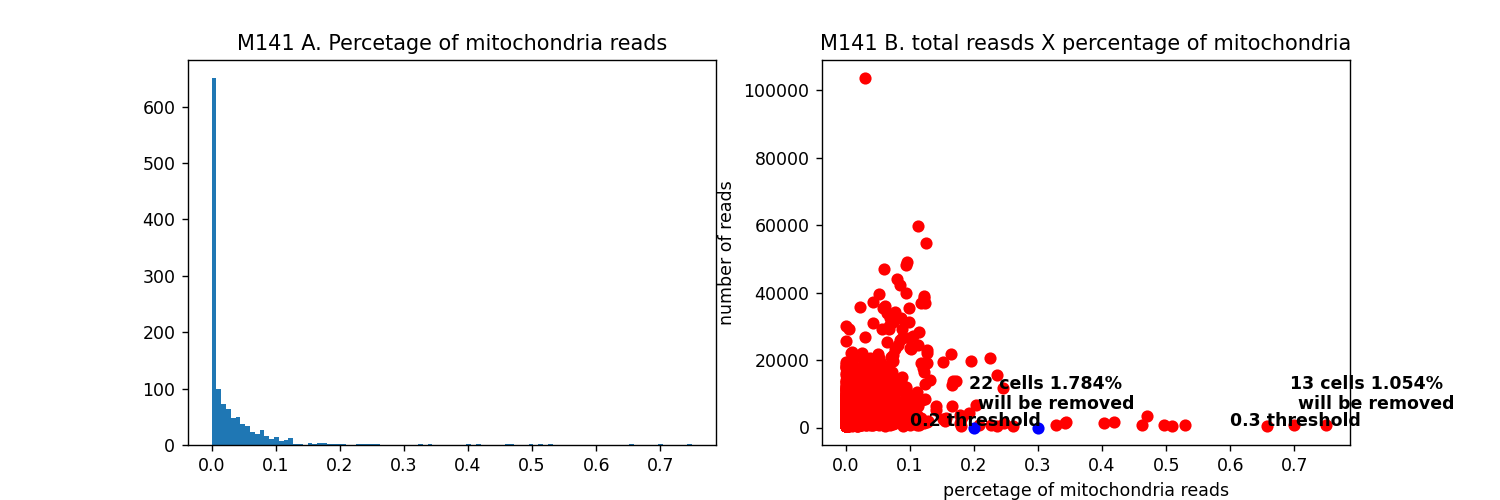

M141
number of cells which their mitochondria genes account more than 20.0% : 22
the portion of cells we would drop: 1.784%
number of cells which their mitochondria genes account more than 30.0% : 13
the portion of cells we would drop: 1.054%


<ipython-input-38-eee920e9ce03>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2)


<IPython.core.display.Javascript object>


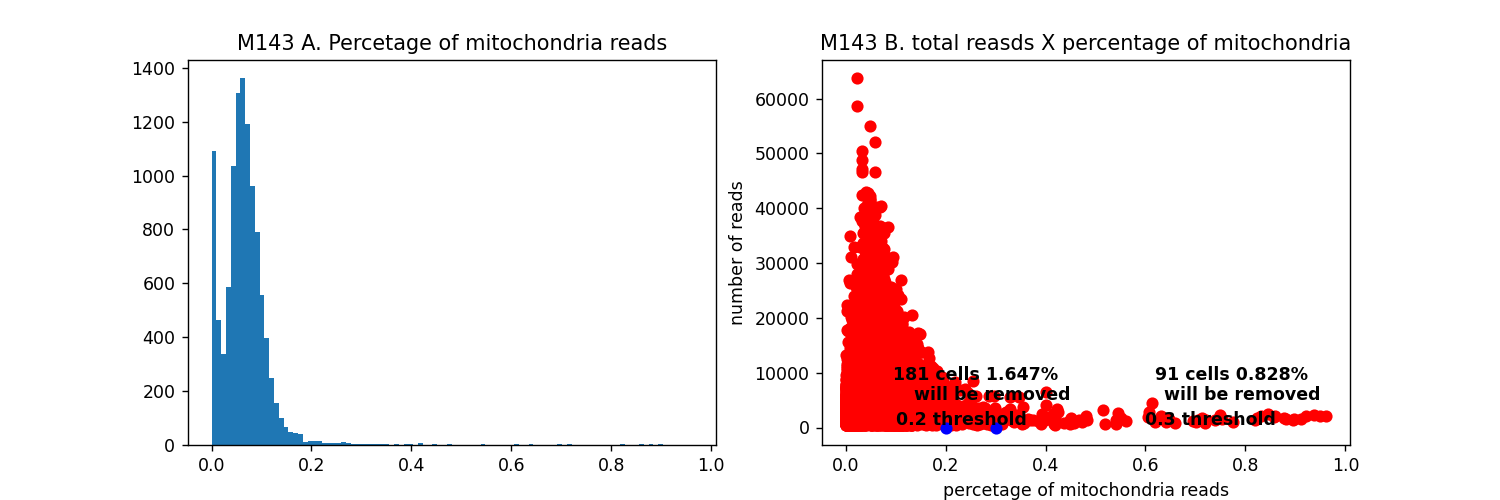

M143
number of cells which their mitochondria genes account more than 20.0% : 181
the portion of cells we would drop: 1.647%
number of cells which their mitochondria genes account more than 30.0% : 91
the portion of cells we would drop: 0.828%


<ipython-input-38-eee920e9ce03>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2)


<IPython.core.display.Javascript object>


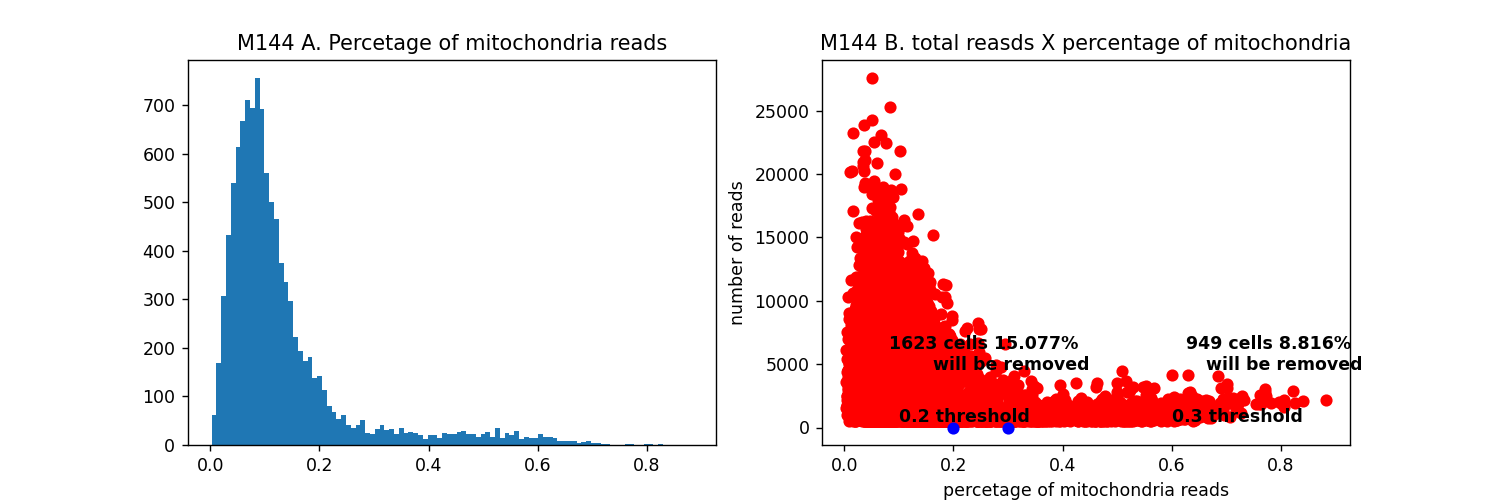

M144
number of cells which their mitochondria genes account more than 20.0% : 1623
the portion of cells we would drop: 15.077%
number of cells which their mitochondria genes account more than 30.0% : 949
the portion of cells we would drop: 8.816%


<ipython-input-38-eee920e9ce03>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2)


<IPython.core.display.Javascript object>


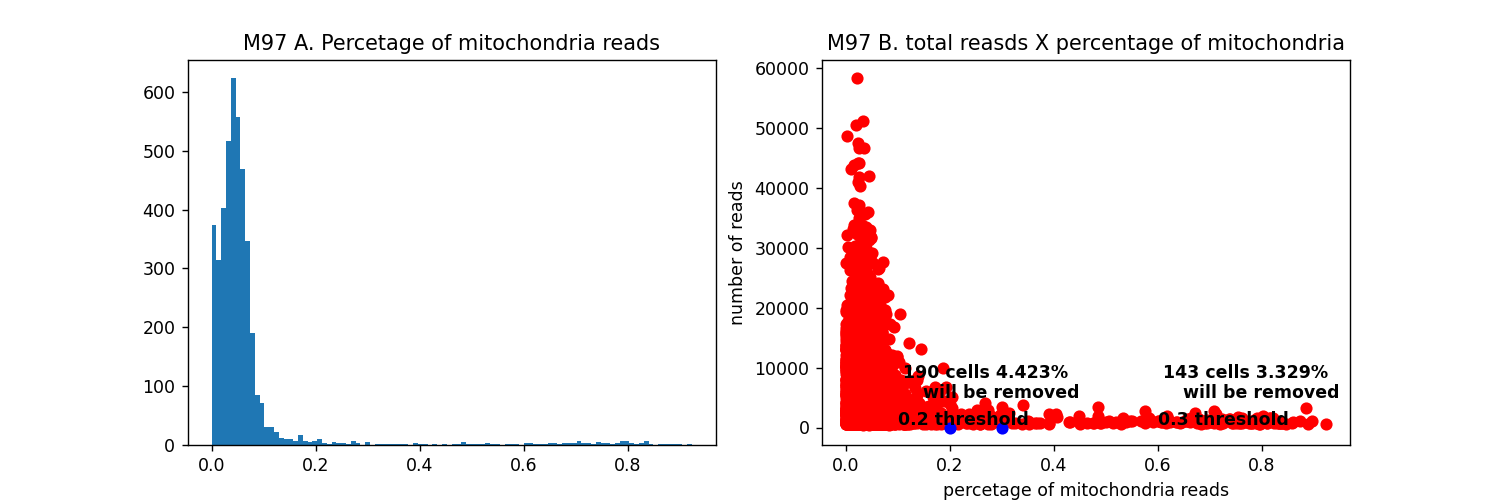

M97
number of cells which their mitochondria genes account more than 20.0% : 190
the portion of cells we would drop: 4.423%
number of cells which their mitochondria genes account more than 30.0% : 143
the portion of cells we would drop: 3.329%


<ipython-input-38-eee920e9ce03>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2)


<IPython.core.display.Javascript object>


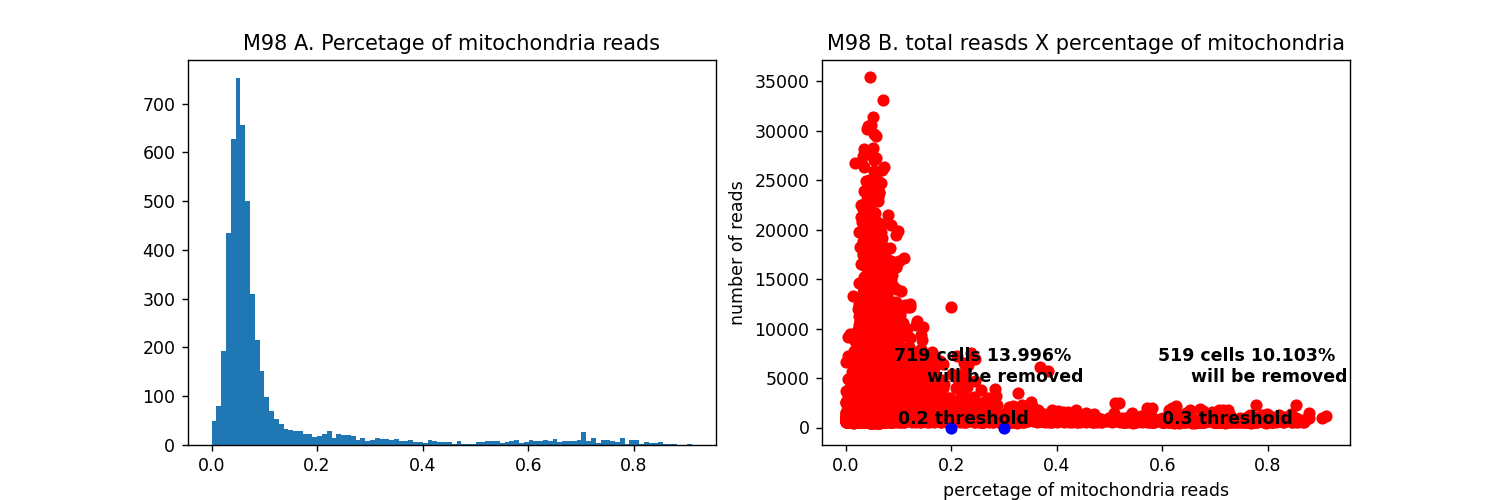

M98
number of cells which their mitochondria genes account more than 20.0% : 719
the portion of cells we would drop: 13.996%
number of cells which their mitochondria genes account more than 30.0% : 519
the portion of cells we would drop: 10.103%


<ipython-input-38-eee920e9ce03>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2)


<IPython.core.display.Javascript object>


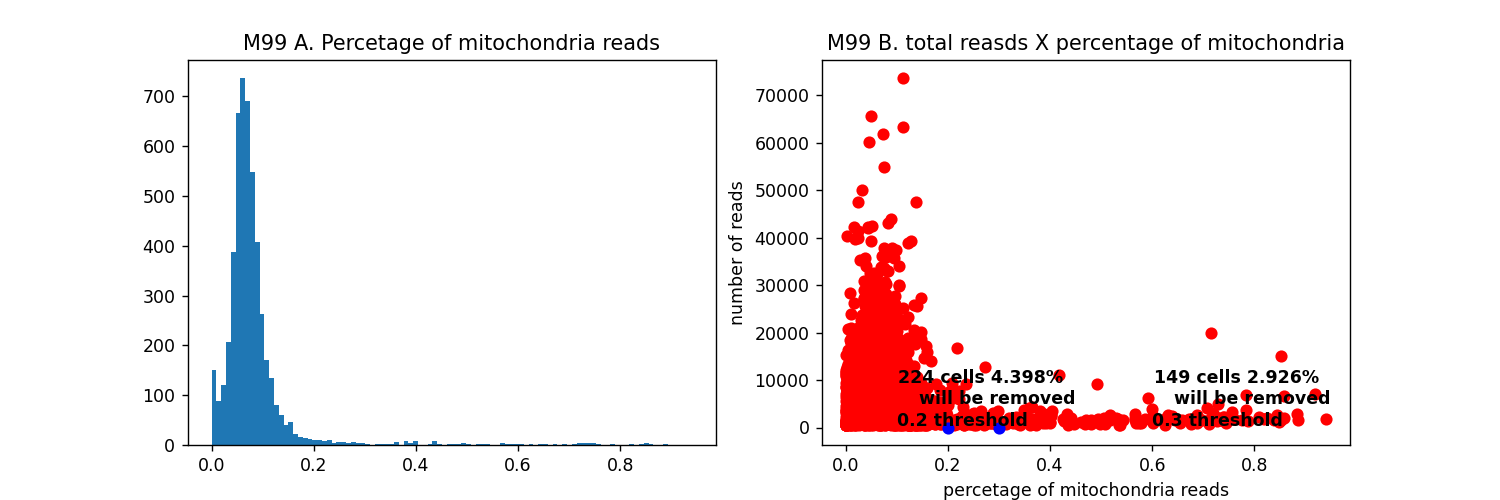

M99
number of cells which their mitochondria genes account more than 20.0% : 224
the portion of cells we would drop: 4.398%
number of cells which their mitochondria genes account more than 30.0% : 149
the portion of cells we would drop: 2.926%


In [38]:
sample = fr'D:\Technion studies\Keren Laboratory\Data\droplet_seq\all_samples'
OUTPUT_PATH = fr'D:\Technion studies\Keren Laboratory\python_playground\outputs\apoptosis\17.11.20'
threshold_1 = 0.2
threshold_2 = 0.3




thr_1_percent = []
thr_1_count = []
thr_2_percent = []
thr_2_count = []

folders = [subfolder for subfolder in os.listdir(SAMPLES_PATH)]
for s_idx, sample_id in enumerate(folders):
    fig, axs = plt.subplots(1, 2)
    fig.set_size_inches(12, 4) # W X H
    print(sample_id)

    # Extract sample.
    sample_path = join(SAMPLES_PATH, fr'{sample_id}\RNA_sample.pkl')
    data = pickle.load(open(sample_path, 'rb'))
    genes = data.gene_names
    counts = data.counts
    counting_reads = counts.sum(axis=1)
    mitochondria_genes = counts[:, [s.startswith('MT-') for s in genes]].sum(axis=1)
    

    # Extract mitochondria content.
    counting_reads = counting_reads.astype(np.float64)
    mitochondria_genes = mitochondria_genes.astype(np.float64)
    percetage_of_mitochondria = np.divide(mitochondria_genes, counting_reads, out=np.zeros_like(counting_reads), where=counting_reads!=0)


    # 1. Histogram of percetage of mitochondria content.
    axs[0].hist(percetage_of_mitochondria, bins=100)
    axs[0].set_title(f"{sample_id} A. Percetage of mitochondria reads")


    threshold_1_text, thre1_count, thre1_percent = mitochondria_content_threshold(percetage_of_mitochondria, threshold_1)
    threshold_2_text, thre2_count, thre2_percent = mitochondria_content_threshold(percetage_of_mitochondria, threshold_2)   
    thr_1_count.append(thre1_count)
    thr_1_percent.append(thre1_percent)
    thr_2_count.append(thre2_count)
    thr_2_percent.append(thre2_percent)
    

    # 2. Plot of  X - Percetage of mitochondria content. Y - Number of reads.
    axs[1].plot(percetage_of_mitochondria, counting_reads, 'ro')
    axs[1].plot([threshold_1, threshold_2], [0, 0], 'bo')
    axs[1].set_title(f"{sample_id} B. total reasds X percentage of mitochondria")
    axs[1].set_ylabel('number of reads')
    axs[1].set_xlabel('percetage of mitochondria reads')


    # Polishes it a little bit.
    plt.annotate(f"{threshold_1} threshold",xy=(0.1,400), weight='bold')
    plt.annotate(f"{threshold_2} threshold",xy=(0.6,400), weight='bold')
    plt.text(0.45,4200, threshold_1_text,
            verticalalignment='bottom', horizontalalignment='right',
            color='black',weight='bold', fontsize=10)
    plt.text(0.95,4200, threshold_2_text,
            verticalalignment='bottom', horizontalalignment='right',
            color='black',weight='bold', fontsize=10)
    
    fig.savefig(join(OUTPUT_PATH, rf'{sample_id}.png'))

    
csv_path = join(OUTPUT_PATH, f'apoptosis_threshold_{threshold_1}_{threshold_2}.csv')
pandas.DataFrame({'sample': folders,
                  f'threshold {threshold_1} number of cells will be removed': thr_1_count,
                  f'threshold {threshold_1} percentage of cells will be removed': thr_1_percent,
                 f'threshold {threshold_2} number of cells will be removed': thr_2_count,
                 f'threshold {threshold_2} percentage of cells will be removed': thr_2_percent,}).to_csv(csv_path)
    


# Use cloupe Clusters to remove Apoptosis
Specify the sample id and interesting cluster numbers you want to examine their removal (assign cells belong to these clusters  as apoptosis).

count shape (5137, 20626)
number of cells 5137
number of genes 20626
cluster portion 0.10142106287716567
counts shape (521, 20626)


<IPython.core.display.Javascript object>


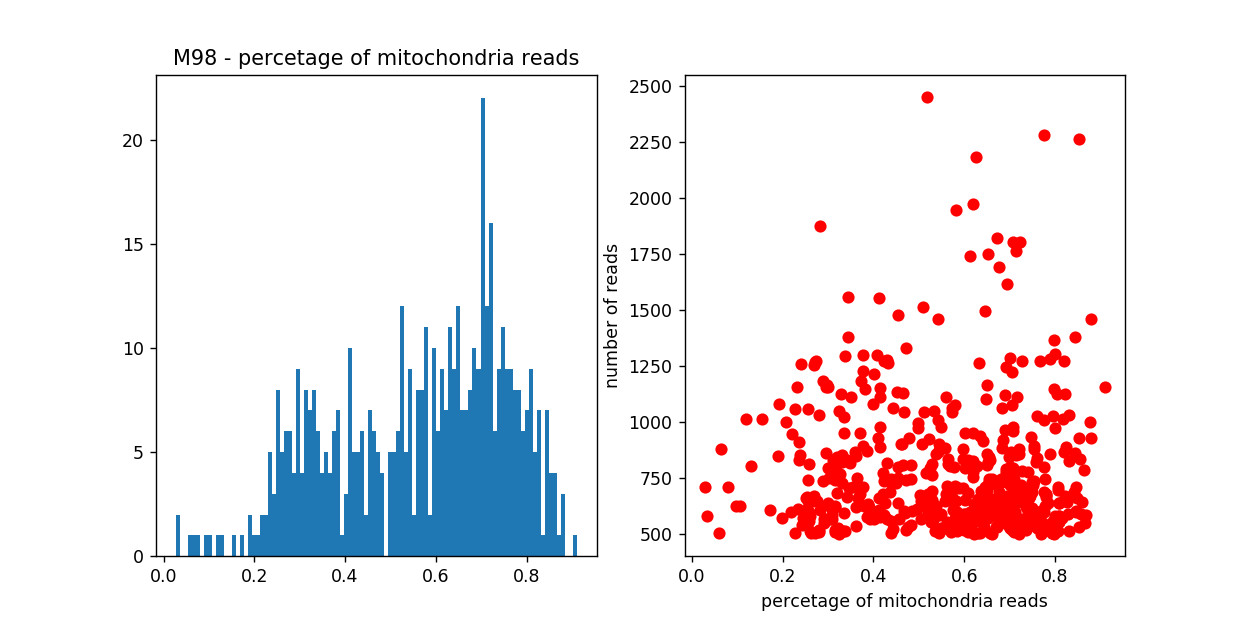

Text(0.5, 0, 'percetage of mitochondria reads')

In [8]:
# select sample id
sample_id = 'M98'
intersting_cluster = [3]
present_what_left = False # True - show the cells will remain after apoptosis removal. False -show apoptosis cells.




# Sample extraction
sample = fr'D:\Technion studies\Keren Laboratory\Data\droplet_seq\all_samples\{sample_id}\RNA_sample.pkl'
data = pickle.load(open(sample, 'rb'))
genes = data.gene_names
counts = data.counts
print(f'count shape {counts.shape}')
print(f'number of cells {counts.shape[0]}')
print(f'number of genes {counts.shape[1]}')


# Clusters extraction
CLUSTER_FOLDER_PATH = r'D:\Technion studies\Keren Laboratory\Data\Melanoma\clusters'
cluster_table_path = join(CLUSTER_FOLDER_PATH, f'Graph_based_{sample_id}.csv')
cluster_df = pd.read_csv(cluster_table_path)



cluster_indexes = np.array([int(s.split(' ')[1]) for s in list(cluster_df['Graph-based'])])
cluster_indexes = np.isin(cluster_indexes, intersting_cluster)
print(f'cluster portion {sum(cluster_indexes)/counts.shape[0]}')
if present_what_left:
    counts = counts[cluster_indexes != True]
else: 
    counts = counts[cluster_indexes]
print(f'counts shape {counts.shape}')


# Extract mitochondria content.
counting_reads = counts.sum(axis=1)
mitochondria_genes = counts[:, [s.startswith('MT-') for s in genes]].sum(axis=1)


fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 5)



counting_reads = counting_reads.astype(np.float64)
mitochondria_genes = mitochondria_genes.astype(np.float64)
percetage_of_mitochondria = np.divide(mitochondria_genes, counting_reads, out=np.zeros_like(counting_reads), where=counting_reads!=0)


# 1. Histogram of percetage of mitochondria content.
axs[0].hist(percetage_of_mitochondria, bins=100)
axs[0].set_title(f"{sample_id} - percetage of mitochondria reads")



# 2. Plot of  X - Percetage of mitochondria content. Y - Number of reads.
axs[1].plot(percetage_of_mitochondria, counting_reads, 'ro')
axs[1].set_ylabel('number of reads')
axs[1].set_xlabel('percetage of mitochondria reads')

# Debug

count shape (22694, 21324)
number of cells 22694
number of genes 21324


<IPython.core.display.Javascript object>


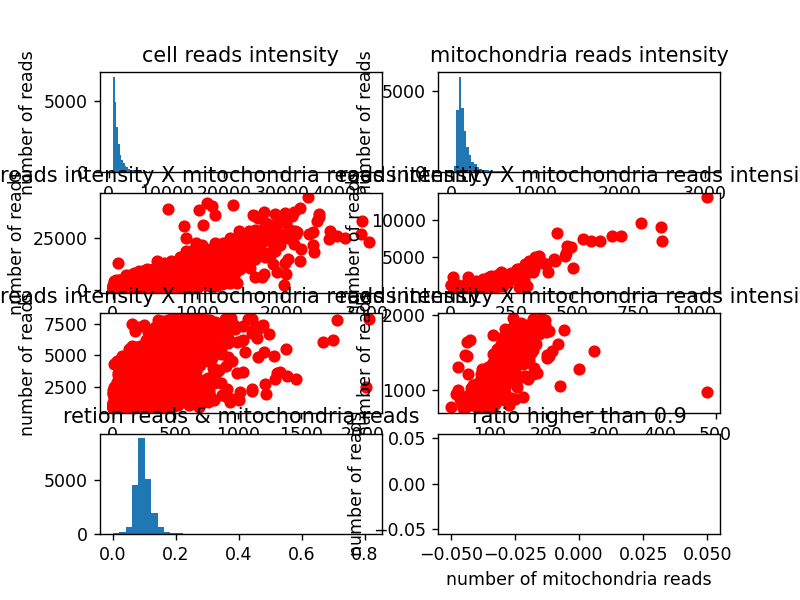

num of mitochondria genes 13
mitochondria genes ['MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB']
pearson correlation  (0.9057029939265513, 0.0)
counting_reads shape  (22694,)
mitochondria_genes shape  (22694,)
number of cells which their mitochondria genes account more than 90.0% : 0
the portion of cells we would drop: 0.0%


In [20]:
# figure(num=None, figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')

sample_id = 'M102'
sample = fr'D:\Technion studies\Keren Laboratory\Data\droplet_seq\all_samples\{sample_id}\RNA_sample.pkl'
data = pickle.load(open(sample, 'rb'))
genes = data.gene_names
counts = data.counts
print(f'count shape {counts.shape}')
print(f'number of cells {counts.shape[0]}')
print(f'number of genes {counts.shape[1]}')

fig, axs = plt.subplots(4, 2)
# fig.set_size_inches(16.5, 14.5)


counting_reads = counts.sum(axis=1)
mitochondria_genes = counts[:, [s.startswith('MT-') for s in genes]].sum(axis=1)
mit = [s for s in genes if s.startswith('MT-')]
print(f'num of mitochondria genes {len(mit)}')
print(f'mitochondria genes {mit}')
print(f'pearson correlation  {pearsonr(counting_reads, mitochondria_genes)}')
print(f'counting_reads shape  {counting_reads.shape}')
print(f'mitochondria_genes shape  {mitochondria_genes.shape}')



# plot 1 - cell reads intensity
axs[0, 0].hist(counting_reads, bins=150)
axs[0, 0].set_title("cell reads intensity")
axs[0, 0].set_ylabel('number of reads')
axs[0, 0].set_xlabel('indexes')



# plot 2
axs[0, 1].hist(mitochondria_genes, bins=100)
axs[0, 1].set_title("mitochondria reads intensity")
axs[0, 1].set_ylabel('number of reads')
axs[0, 1].set_xlabel('indexes')



# plot 3
axs[1, 0].plot(mitochondria_genes, counting_reads, 'ro')
axs[1, 0].set_title("reads intensity X mitochondria reads intensity")
axs[1, 0].set_xlabel('number of mitochondria reads')
axs[1, 0].set_ylabel('number of reads')


# plot 4
rand = random.choices(range(len(counting_reads)), k=300)
axs[1, 1].plot(mitochondria_genes[rand], counting_reads[rand], 'ro')
axs[1, 1].set_title("reads intensity X mitochondria reads intensity")
axs[1, 1].set_xlabel('number of mitochondria reads')
axs[1, 1].set_ylabel('number of reads')



# plot 5
indexes = np.where(counting_reads<8000)
counting_reads_small = counting_reads[indexes]
mitochondria_genes_small = mitochondria_genes[indexes]
axs[2, 0].plot(mitochondria_genes_small, counting_reads_small, 'ro')
axs[2, 0].set_title("reads intensity X mitochondria reads intensity")
axs[2, 0].set_xlabel('number of mitochondria reads')
axs[2, 0].set_ylabel('number of reads')


# plot 6
indexes = np.where(counting_reads<2000)
rand = random.choices(range(len(sum(indexes))), k=300)
counting_reads_small = counting_reads[indexes][rand]
mitochondria_genes_small = mitochondria_genes[indexes][rand]
axs[2, 1].plot(mitochondria_genes_small, counting_reads_small, 'ro')
axs[2, 1].set_title("reads intensity X mitochondria reads intensity")
axs[2, 1].set_xlabel('number of mitochondria reads')
axs[2, 1].set_ylabel('number of reads')



# plot 7
counting_reads = counting_reads.astype(np.float64)
mitochondria_genes = mitochondria_genes.astype(np.float64)
res = np.divide(mitochondria_genes, counting_reads, out=np.zeros_like(counting_reads), where=counting_reads!=0)
axs[3, 0].hist(res, bins=40)
axs[3, 0].set_title("retion reads & mitochondria reads")



# plot 8
ratio_of_interest = 0.9
indexes = np.where(res>ratio_of_interest)
axs[3, 1].plot(mitochondria_genes[indexes], counting_reads[indexes], 'ro')
axs[3, 1].set_title(f"ratio higher than {ratio_of_interest}")
axs[3, 1].set_xlabel('number of mitochondria reads')
axs[3, 1].set_ylabel('number of reads')
print(f'number of cells which their mitochondria genes account more than {ratio_of_interest*100}% : {len(mitochondria_genes[indexes])}')
print(f'the portion of cells we would drop: {round(len(mitochondria_genes[indexes])/counts.shape[0]*100, 3)}%')


# Debug 30.11.20

count shape (22694, 21324)
number of cells 22694
number of genes 21324


<IPython.core.display.Javascript object>


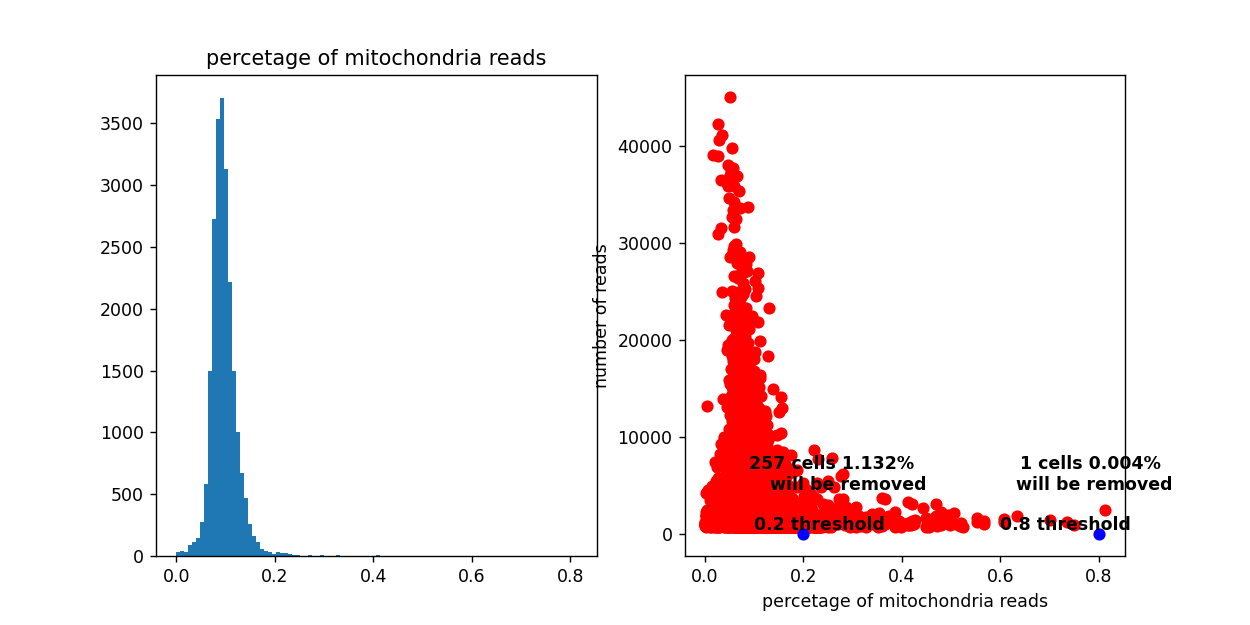

number of cells which their mitochondria genes account more than 20.0% : 257
the portion of cells we would drop: 1.132%
number of cells which their mitochondria genes account more than 80.0% : 1
the portion of cells we would drop: 0.004%


Text(0.95, 4200, '1 cells 0.004%  \n will be removed')

In [5]:






counting_reads = counts.sum(axis=1)
mitochondria_genes = counts[:, [s.startswith('MT-') for s in genes]].sum(axis=1)


fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

# Extract mitochondria content.
counting_reads = counting_reads.astype(np.float64)
mitochondria_genes = mitochondria_genes.astype(np.float64)
percetage_of_mitochondria = np.divide(mitochondria_genes, counting_reads, out=np.zeros_like(counting_reads), where=counting_reads!=0)


# 1. Histogram of percetage of mitochondria content.
axs[0].hist(percetage_of_mitochondria, bins=100)
axs[0].set_title("percetage of mitochondria reads")


threshold_1_text, _, _ = mitochondria_content_threshold(percetage_of_mitochondria, threshold_1)
threshold_2_text, _, _ = mitochondria_content_threshold(percetage_of_mitochondria, threshold_2)


# 2. Plot of  X - Percetage of mitochondria content. Y - Number of reads.
axs[1].plot(percetage_of_mitochondria, counting_reads, 'ro')
axs[1].plot([threshold_1, threshold_2], [0, 0], 'bo')
axs[1].set_ylabel('number of reads')
axs[1].set_xlabel('percetage of mitochondria reads')


# Polishes it a little bit.
plt.annotate(f"{threshold_1} threshold",xy=(0.1,400), weight='bold')
plt.annotate(f"{threshold_2} threshold",xy=(0.6,400), weight='bold')
plt.text(0.45,4200, threshold_1_text,
        verticalalignment='bottom', horizontalalignment='right',
        color='black',weight='bold', fontsize=10)
plt.text(0.95,4200, threshold_2_text,
        verticalalignment='bottom', horizontalalignment='right',
        color='black',weight='bold', fontsize=10)


# if you want to save it, remove the comment
# fig.savefig(rf'C:\Users\itay\Desktop\Technion studies\Keren Laboratory\python_playground\output files\apoptosis\{sample_id}.png')
